In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
import os

In [45]:
ukb_adni_directory_path="/ocean/projects/asc170022p/tighu/ADNI_UKB_Harmonization_May_2022/"
unharmonized_df=pd.read_csv(ukb_adni_directory_path+"adni_6_ukb_stacked_may2022.csv")

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
unharmonized_df.head(5)

,Subject_ID,Group,Sex,Age,Date_of_Brain_Scan,Scanner_Proxy,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,...,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,EstimatedTotalIntraCranialVol,Dataset
0,1000295,CN,M,59,2017-10-27,Newcastle,2.362,1.277,2.511,2.038,...,74024,818307.374370,1.388836e+06,1.351159e+06,1348707,1988305,0.904154,1.135316,1.751323e+06,UKB
1,1000397,CN,F,59,2018-03-07,Newcastle,2.557,2.949,3.010,1.909,...,53103,645218.597035,1.042441e+06,1.000121e+06,995239,1555091,0.783897,1.033555,1.504604e+06,UKB
2,1000432,CN,M,62,2018-07-14,Cheadle,2.747,3.181,2.813,1.984,...,55982,678619.948762,1.095522e+06,1.069967e+06,1065284,1617026,0.831715,1.077098,1.501280e+06,UKB
3,1000591,CN,M,62,2019-07-09,Reading,2.803,2.418,3.095,2.087,...,64072,762356.497882,1.213087e+06,1.187227e+06,1183537,1842042,0.803061,1.074893,1.713697e+06,UKB
4,1000882,CN,M,58,2017-11-16,Cheadle,2.506,2.722,2.997,1.847,...,66041,749467.819722,1.298545e+06,1.271570e+06,1265770,1862677,0.795217,1.013020,1.838737e+06,UKB


In [47]:
ukb_age = unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].values

unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].describe()

count    33051.000000
mean        64.579559
std          7.715335
min         45.000000
25%         59.000000
50%         65.000000
75%         71.000000
max         83.000000
Name: Age, dtype: float64

In [48]:
adni_age = unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].values
unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].describe()

count    3465.000000
mean       76.285137
std         6.770621
min        55.000000
25%        72.000000
50%        76.000000
75%        81.000000
max        93.000000
Name: Age, dtype: float64

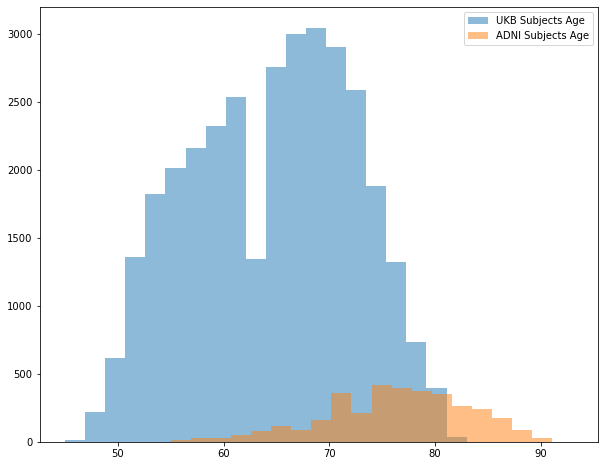

In [49]:
import numpy
from matplotlib import pyplot
pyplot.hist(ukb_age, bins=20, alpha=0.5, label='UKB Subjects Age')
pyplot.hist(adni_age, bins=20, alpha=0.5, label='ADNI Subjects Age')
pyplot.legend(loc='upper right')
pyplot.show()

<AxesSubplot:ylabel='Frequency'>

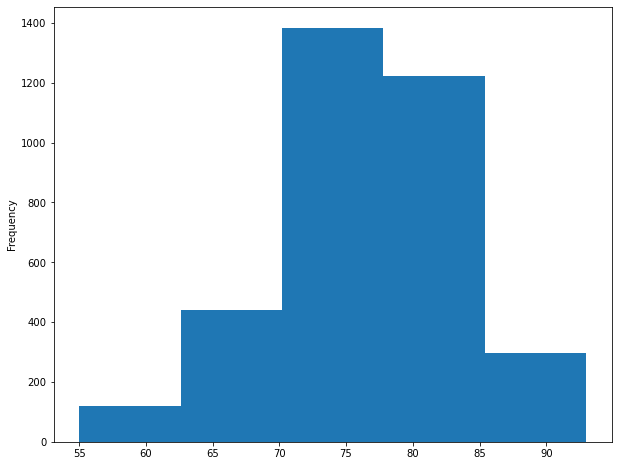

In [50]:
unharmonized_df[unharmonized_df.Dataset=="ADNI"]['Age'].plot(kind='hist',bins=5)

<AxesSubplot:ylabel='Frequency'>

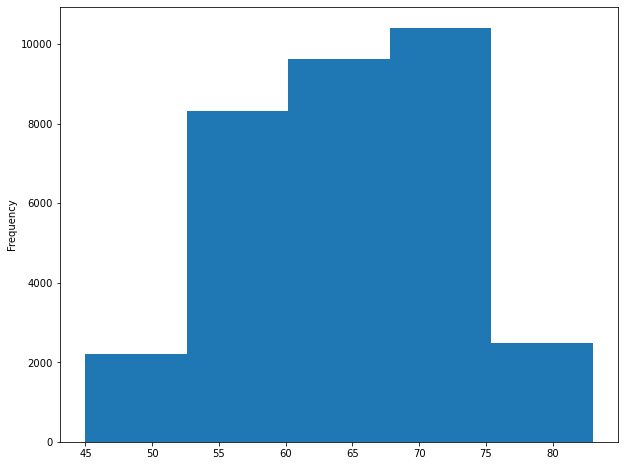

In [51]:
unharmonized_df[unharmonized_df.Dataset=="UKB"]['Age'].plot(kind='hist',bins=5)

In [52]:
len(ukb_age),len(adni_age)

(33051, 3465)

In [53]:
unharmonized_df['Subject_ID'].nunique()

31845

In [54]:
list(unharmonized_df.columns)

['Subject_ID',
 'Group',
 'Sex',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_super

In [55]:
# changes = {}
# for colname in unharmonized_df.columns:
#     if ' ' in colname or '-' in colname:
#         changes[colname] = colname.replace(' ', '_').replace('-', '_')
# unharmonized_df=unharmonized_df.rename(changes, axis=1)

In [56]:
unharmonized_df.describe(percentiles=[])

,Age,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,...,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,EstimatedTotalIntraCranialVol
count,36516.0000,36516.000000,36516.000000,36516.000000,36516.000000,36516.000000,36516.000000,36516.000000,36516.000000,36516.000000,...,36516.000000,36516.000000,36516.000000,3.651600e+04,3.651600e+04,3.651600e+04,3.651600e+04,36516.000000,36516.000000,3.651600e+04
mean,65.6903,2.622037,2.583456,2.787140,1.938245,3.219124,2.871134,2.617074,2.944760,2.411049,...,474927.379218,54547.348806,652562.042348,1.048068e+06,1.017650e+06,1.013836e+06,1.596491e+06,0.770129,1.031475,1.548881e+06
std,8.3663,0.230897,0.433445,0.237116,0.164507,0.347039,0.192331,0.209741,0.197669,0.211168,...,58227.898136,5152.285274,69064.582044,1.123155e+05,1.105200e+05,1.102097e+05,1.567597e+05,0.041652,0.034840,1.556824e+05
min,45.0000,1.383000,0.666000,1.390000,1.246000,1.022000,1.630000,1.360000,1.732000,1.378000,...,294242.765511,29721.000000,354473.014112,6.440612e+05,5.973162e+05,5.958910e+05,1.109912e+06,0.210131,0.275478,6.431333e+05
50%,66.0000,2.648000,2.634000,2.831000,1.940000,3.254000,2.902000,2.659000,2.971000,2.415000,...,471861.563352,54432.500000,653470.876543,1.043594e+06,1.014531e+06,1.010607e+06,1.590659e+06,0.774580,1.030529,1.541210e+06
max,93.0000,3.353000,3.962000,3.440000,2.583000,4.282000,3.423000,3.217000,3.540000,3.233000,...,736697.817667,81896.000000,967825.239735,1.515658e+06,1.470443e+06,1.463737e+06,2.231729e+06,1.839838,2.425884,5.740888e+06


In [71]:
def make_box_plot(df, x, y):
    '''Creates a simple box plot for data in a dataframe. x should be discrete, y continuous'''
    xkeys = df[x].unique()
    data=[]
    for key in xkeys:
        data.append(df[df[x] == key][y])

    plt.boxplot(data, labels=xkeys)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)


def make_box_plot2x(df, x, y):
    '''Creates a simple box plot for data in a dataframe. 2 x variables should be discrete, y continuous'''
    xkeys0 = df[x[0]].unique()
    xkeys1 = df[x[1]].unique()
    data=[]
    labels=[]
    for key0 in xkeys0:
        for key1 in xkeys1:
            data.append(df[(df[x[0]] == key0) & (df[x[1]] == key1)][y])
            labels.append(key0 + ' ' + key1)
    plt.boxplot(data, labels=labels)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    
def make_box_plot3x(df, x, y):
    '''Creates a simple box plot for data in a dataframe. 3 x variables should be discrete, y continuous'''
    xkeys0 = df[x[0]].unique()
    xkeys1 = df[x[1]].unique()
    xkeys2 = df[x[2]].unique()
    data=[]
    labels=[]
    for key0 in xkeys0:
        for key1 in xkeys1:
            for key2 in xkeys2:
#                 print(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)][y])
                data.append(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)][y])
                labels.append(key0 + ' ' + key1 + '  '+ key2+"\n n="+str(df[(df[x[0]] == key0) & (df[x[1]] == key1) & (df[x[2]] == key2)].shape[0]))
    plt.boxplot(data, labels=labels)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=15)
    
def set_age_flag(age):
    
    if age < 1954:
        return "OTV"
    else:
        return "YTV"

In [58]:
#unharmonized_df['GAvg_age'] = unharmonized_df['Year_of_Birth'].apply(lambda x: set_age_flag(x))

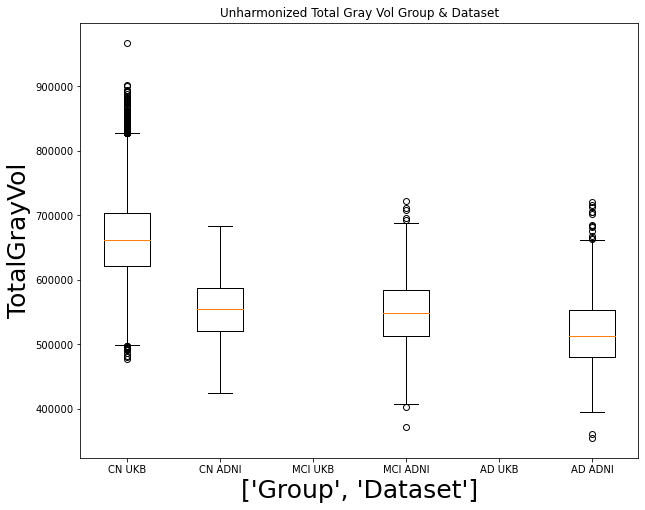

In [59]:
plt.title("Unharmonized Total Gray Vol Group & Dataset")
plt.rcParams['figure.figsize'] = (15,8)
make_box_plot2x(unharmonized_df, ['Group','Dataset'], 'TotalGrayVol')

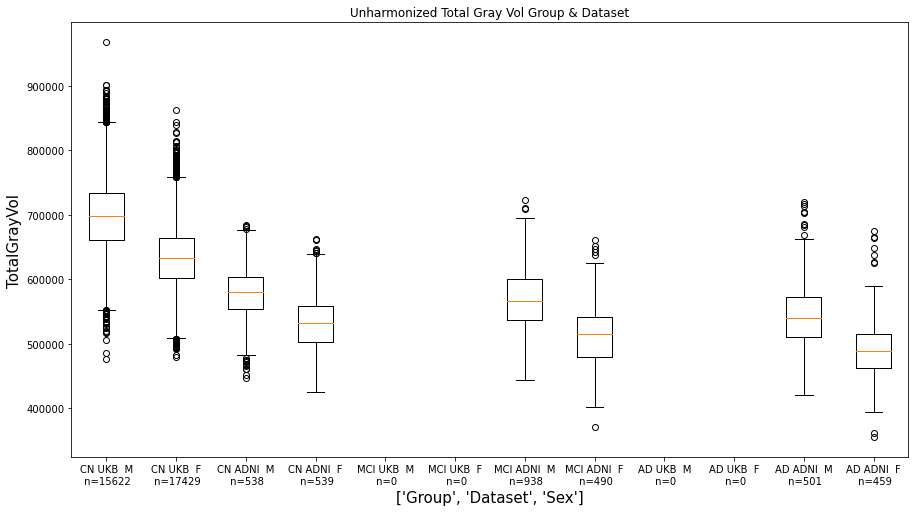

In [60]:
plt.title("Unharmonized Total Gray Vol Group & Dataset")
plt.rcParams['figure.figsize'] = (25,8)
make_box_plot3x(unharmonized_df,['Group','Dataset','Sex'], 'TotalGrayVol')

In [61]:
unharmonized_df['Scanner_Proxy'].nunique()

86

Text(0.5, 1.0, 'Unharmonized Left_Hippocampus values across Groups, Gender and Dataset Type')

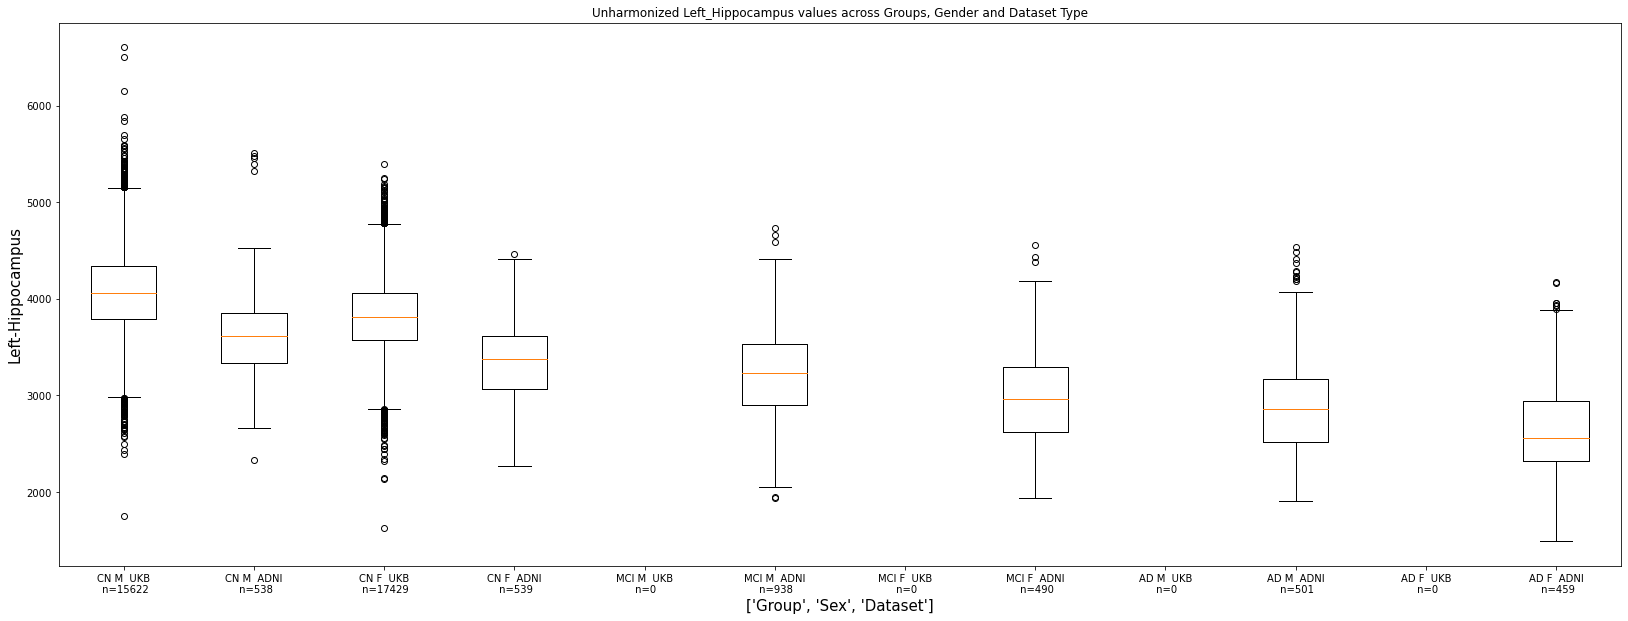

In [62]:
plt.rcParams['figure.figsize'] = (28,10)
make_box_plot3x(unharmonized_df, ['Group', 'Sex','Dataset'], 'Left-Hippocampus')
plt.title("Unharmonized Left_Hippocampus values across Groups, Gender and Dataset Type")

Text(0.5, 1.0, 'unharmonized lh_MeanThickness_thickness Across Group, Gender & Dataset')

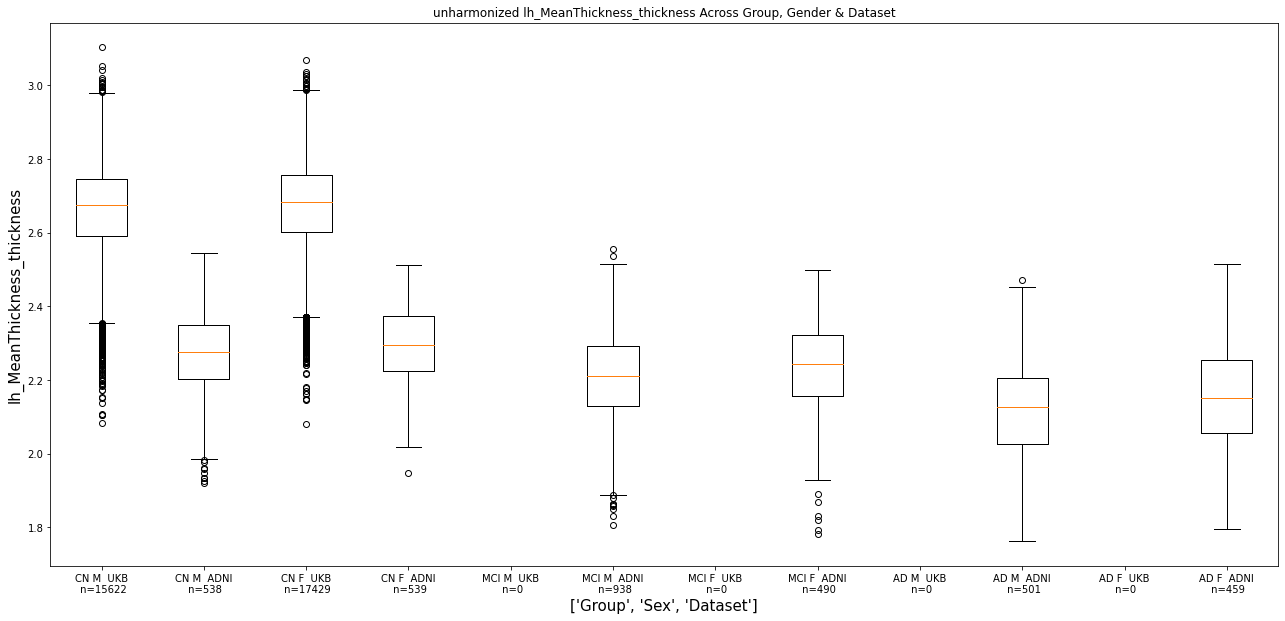

In [63]:
plt.rcParams['figure.figsize'] = (22,10)
make_box_plot3x(unharmonized_df, ['Group', 'Sex','Dataset'], 'lh_MeanThickness_thickness')
plt.title("unharmonized lh_MeanThickness_thickness Across Group, Gender & Dataset")

In [64]:
unharmonized_df.columns[7:129]

Index(['lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       'lh_entorhinal_thickness', 'lh_fusiform_thickness',
       'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness',
       'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness',
       'lh_lateralorbitofrontal_thickness',
       ...
       'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior',
       'BrainSegVol', 'BrainSegVolNotVent', 'BrainSegVolNotVentSurf',
       'lhCortexVol', 'rhCortexVol', 'CortexVol'],
      dtype='object', length=122)

In [67]:
imaging_features=list(unharmonized_df.columns[7:129])

In [68]:
harmonized_df = pd.read_csv(ukb_adni_directory_path+"harmonized_adni6_ukb_May2022.csv")
harmonized_df = harmonized_df.drop('Unnamed: 0', 1)

In [69]:
harmonized_df.head(5)

,Unnamed: 0,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,...,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.SupraTentorialVolNotVentVox.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol.to.eTIV.combat,data_combat.MaskVol.to.eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1,1000295,2017-10-27,Newcastle,2.296284,1.178939,2.276881,2.015306,3.044882,2.892787,...,718072.352420,86726.540546,822884.151319,1.401979e+06,1.363809e+06,1.358895e+06,1.963492e+06,0.967215,1.195924,1.546517e+06
1,2,1000397,2018-03-07,Newcastle,2.500101,2.969933,2.990356,1.886608,3.656489,2.944818,...,458285.797056,53041.117324,639324.340096,1.039510e+06,9.951820e+05,9.904603e+05,1.562235e+06,0.774657,1.028857,1.517763e+06
2,3,1000432,2018-07-14,Cheadle,2.734754,3.305112,2.774210,1.966005,3.201053,2.943196,...,510200.433871,55275.471305,667856.449483,1.085389e+06,1.059081e+06,1.054203e+06,1.609321e+06,0.831234,1.079333,1.498252e+06
3,4,1000591,2019-07-09,Reading,2.779423,2.344385,3.093786,2.079017,3.275997,3.038995,...,557101.565580,64589.102686,754345.174149,1.203525e+06,1.179758e+06,1.177390e+06,1.834101e+06,0.806057,1.083917,1.700009e+06
4,5,1000882,2017-11-16,Cheadle,2.448656,2.768825,2.991334,1.804743,3.340516,2.790543,...,654223.943732,66444.846520,743922.205485,1.296093e+06,1.269282e+06,1.264942e+06,1.865044e+06,0.789774,1.006210,1.843770e+06


In [71]:
harmonized_df.columns

Index(['data_combat.Subject_ID', 'data_combat.Date_of_Brain_Scan',
       'data_combat.Scanner_Proxy', 'data_combat.lh_bankssts_thickness.combat',
       'data_combat.lh_caudalanteriorcingulate_thickness.combat',
       'data_combat.lh_caudalmiddlefrontal_thickness.combat',
       'data_combat.lh_cuneus_thickness.combat',
       'data_combat.lh_entorhinal_thickness.combat',
       'data_combat.lh_fusiform_thickness.combat',
       'data_combat.lh_inferiorparietal_thickness.combat',
       ...
       'data_combat.CerebralWhiteMatterVol.combat',
       'data_combat.SubCortGrayVol.combat', 'data_combat.TotalGrayVol.combat',
       'data_combat.SupraTentorialVol.combat',
       'data_combat.SupraTentorialVolNotVent.combat',
       'data_combat.SupraTentorialVolNotVentVox.combat',
       'data_combat.MaskVol.combat', 'data_combat.BrainSegVol.to.eTIV.combat',
       'data_combat.MaskVol.to.eTIV.combat',
       'data_combat.EstimatedTotalIntraCranialVol.combat'],
      dtype='object', length=

In [72]:
harmonized_df.shape

(36516, 131)

In [73]:
unharmonized_df.shape

(36516, 142)

In [74]:
harmonized_df.head(5)

,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,data_combat.lh_inferiorparietal_thickness.combat,...,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.SupraTentorialVolNotVentVox.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol.to.eTIV.combat,data_combat.MaskVol.to.eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1000295,2017-10-27,Newcastle,2.296284,1.178939,2.276881,2.015306,3.044882,2.892787,2.501170,...,718072.352420,86726.540546,822884.151319,1.401979e+06,1.363809e+06,1.358895e+06,1.963492e+06,0.967215,1.195924,1.546517e+06
1,1000397,2018-03-07,Newcastle,2.500101,2.969933,2.990356,1.886608,3.656489,2.944818,2.794912,...,458285.797056,53041.117324,639324.340096,1.039510e+06,9.951820e+05,9.904603e+05,1.562235e+06,0.774657,1.028857,1.517763e+06
2,1000432,2018-07-14,Cheadle,2.734754,3.305112,2.774210,1.966005,3.201053,2.943196,2.642145,...,510200.433871,55275.471305,667856.449483,1.085389e+06,1.059081e+06,1.054203e+06,1.609321e+06,0.831234,1.079333,1.498252e+06
3,1000591,2019-07-09,Reading,2.779423,2.344385,3.093786,2.079017,3.275997,3.038995,2.591875,...,557101.565580,64589.102686,754345.174149,1.203525e+06,1.179758e+06,1.177390e+06,1.834101e+06,0.806057,1.083917,1.700009e+06
4,1000882,2017-11-16,Cheadle,2.448656,2.768825,2.991334,1.804743,3.340516,2.790543,2.651284,...,654223.943732,66444.846520,743922.205485,1.296093e+06,1.269282e+06,1.264942e+06,1.865044e+06,0.789774,1.006210,1.843770e+06


In [75]:
harmonized_df.index=unharmonized_df.index
all_merged = unharmonized_df.join(harmonized_df)

In [76]:
#gray_vol_df=all_merged

gmv_adni_df=all_merged[(all_merged.Dataset=="ADNI") & (all_merged.Group=="CN")][['Age','data_combat.TotalGrayVol.combat']]
gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','data_combat.TotalGrayVol.combat']]

In [77]:
list(all_merged.columns)

['Subject_ID',
 'Group',
 'Sex',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_super

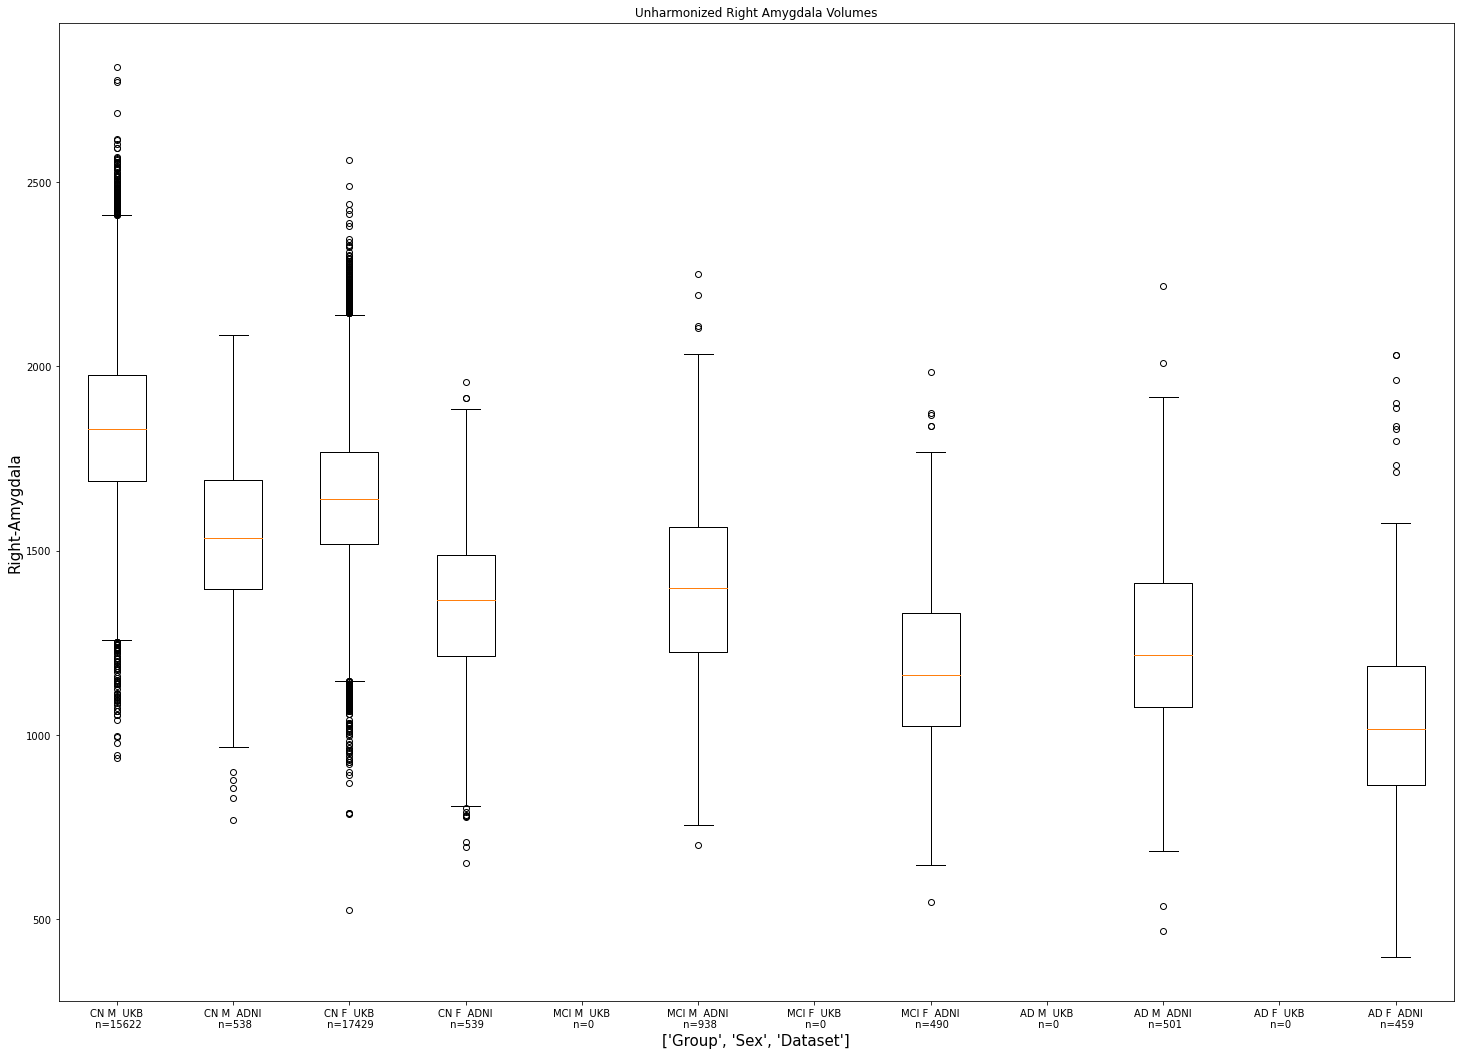

In [78]:
plt.rcParams['figure.figsize'] = (25,18)
plt.title("Unharmonized Right Amygdala Volumes")
make_box_plot3x(all_merged, ['Group','Sex', 'Dataset'], 'Right-Amygdala')

In [39]:
# plt.rcParams['figure.figsize'] = (20,14)
# plt.title("Unharmonized Right Amygdala Volumes for CN Group")
# make_box_plot2x(unharmonized_df[unharmonized_df['Group'] == 'CN'], ['Sex', 'Dataset'], 'Right_Amygdala')

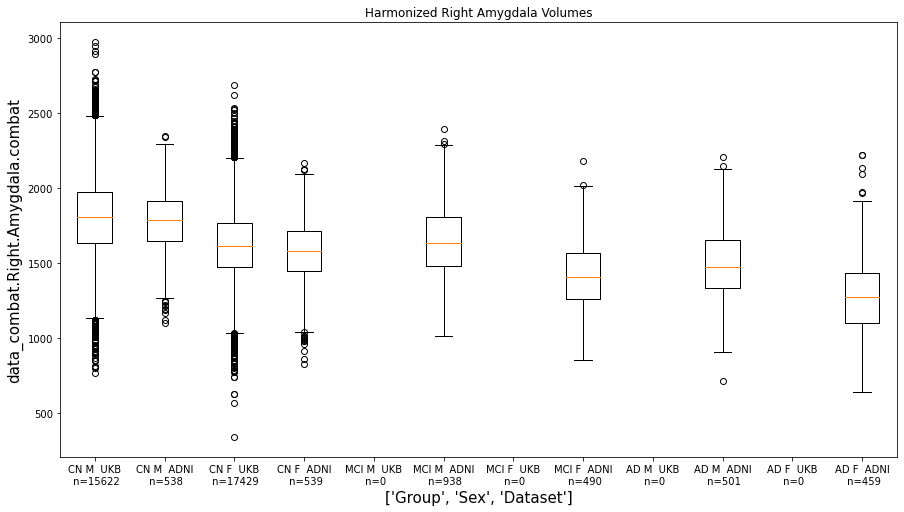

In [79]:
plt.rcParams['figure.figsize'] = (15,8)
plt.title("Harmonized Right Amygdala Volumes")
make_box_plot3x(all_merged, ['Group','Sex', 'Dataset'], 'data_combat.Right.Amygdala.combat')

Text(0.5, 0, 'Group, Sex, Dataset')

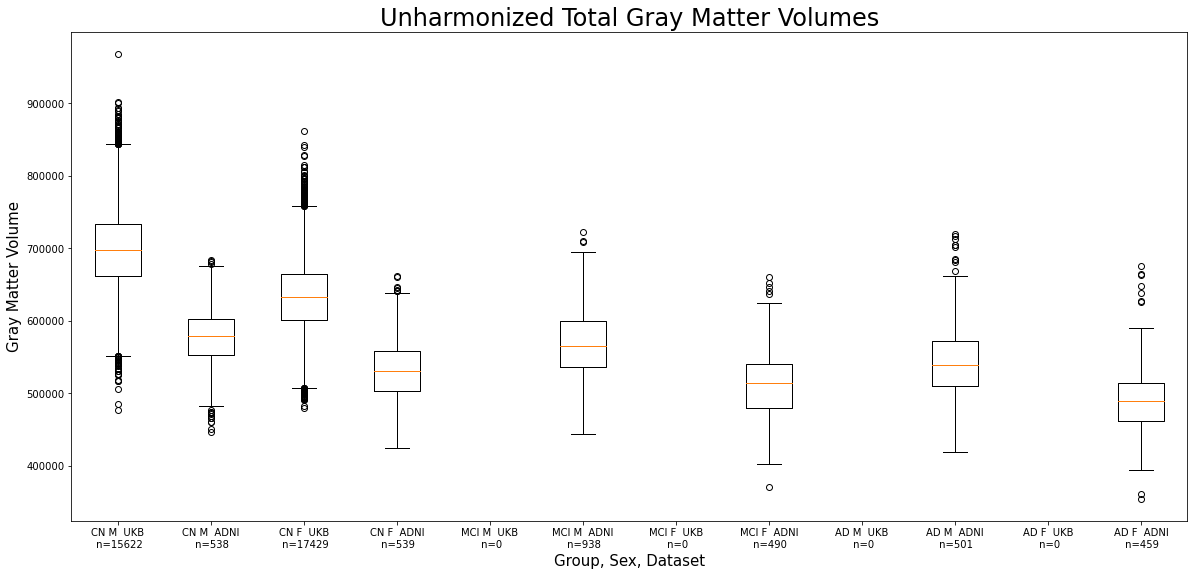

In [80]:
plt.rcParams['figure.figsize'] = (20,9)
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'TotalGrayVol')
plt.title("Unharmonized Total Gray Matter Volumes", fontsize = 24)
plt.ylabel('Gray Matter Volume')
plt.xlabel('Group, Sex, Dataset')
# plt.axvline(2.5, color = 'gray', ls = '--')
# plt.axvline(4.5, color = 'gray', ls = '--')
# plt.axvline(6.5, color = 'gray', ls = '--')

Text(0.5, 0, 'GAvg_age, Sex, Assesment_Centre')

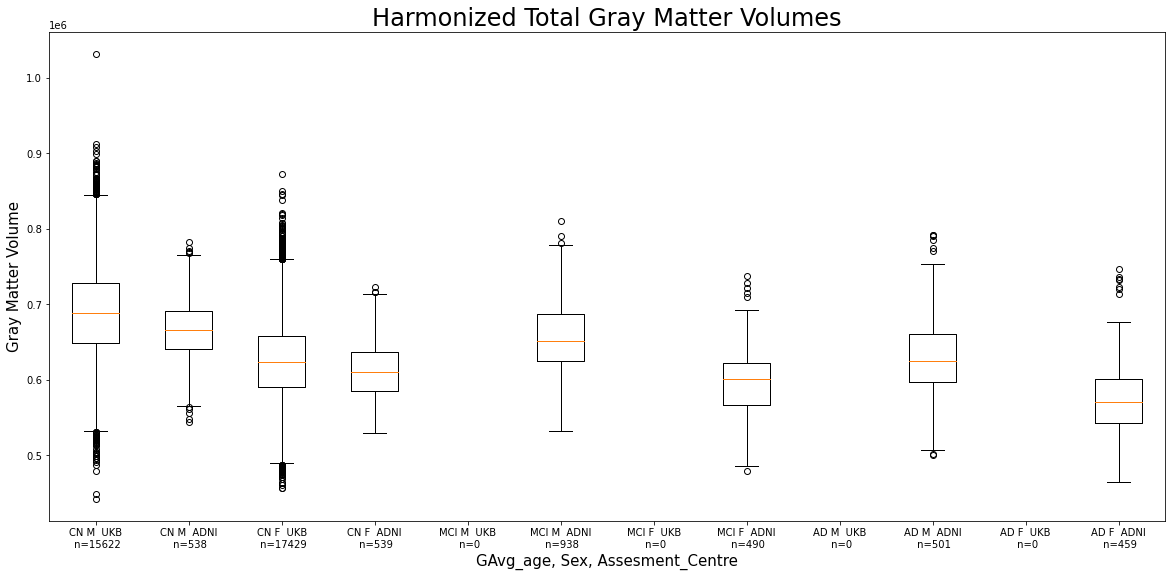

In [81]:
plt.rcParams['figure.figsize'] = (20,9)
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'data_combat.TotalGrayVol.combat')
plt.title("Harmonized Total Gray Matter Volumes", fontsize = 24)
plt.ylabel('Gray Matter Volume')
plt.xlabel('GAvg_age, Sex, Assesment_Centre')
# plt.axvline(2.5, color = 'gray', ls = '--')
# plt.axvline(4.5, color = 'gray', ls = '--')
# plt.axvline(6.5, color = 'gray', ls = '--')

Text(0.5, 1.0, 'Unharmonized')

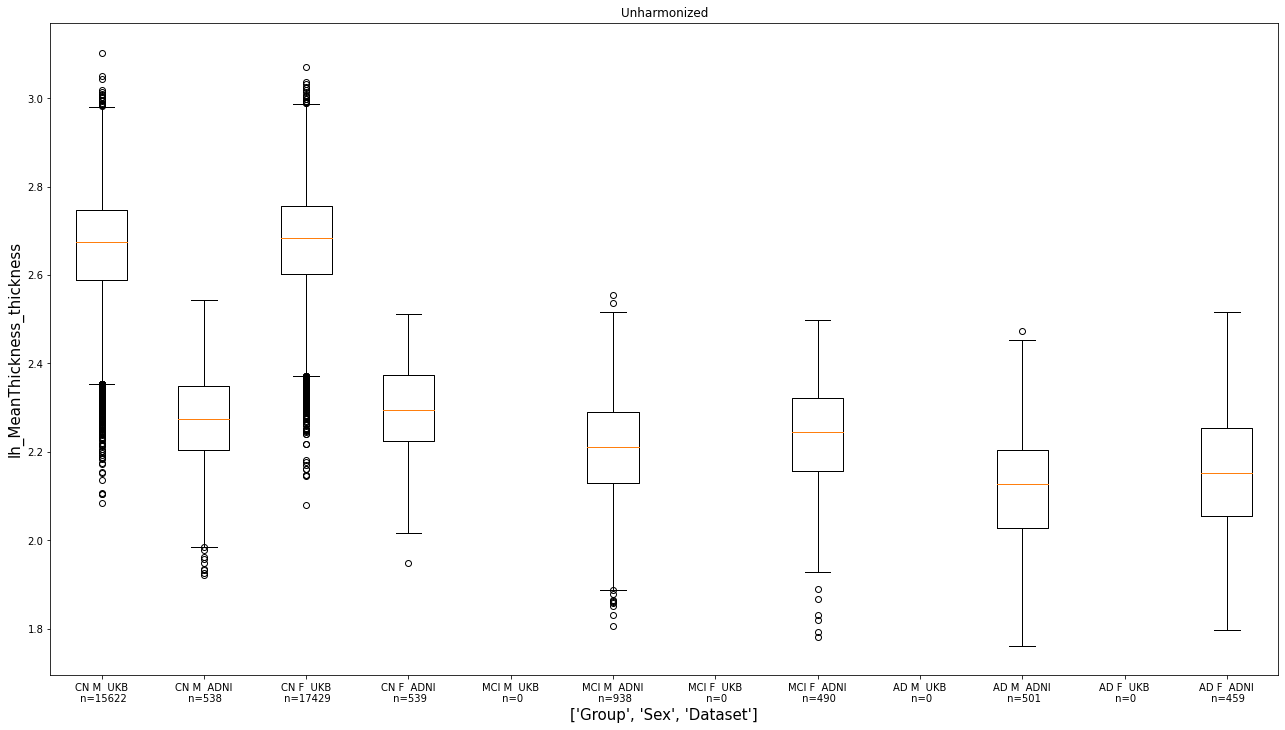

In [82]:
plt.rcParams['figure.figsize'] = (22,12)
plt.title("Unharmonized lh_MeanThickness_thickness")
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'lh_MeanThickness_thickness')
plt.title("Unharmonized")

Text(0.5, 1.0, 'harmonized lh mean thickness')

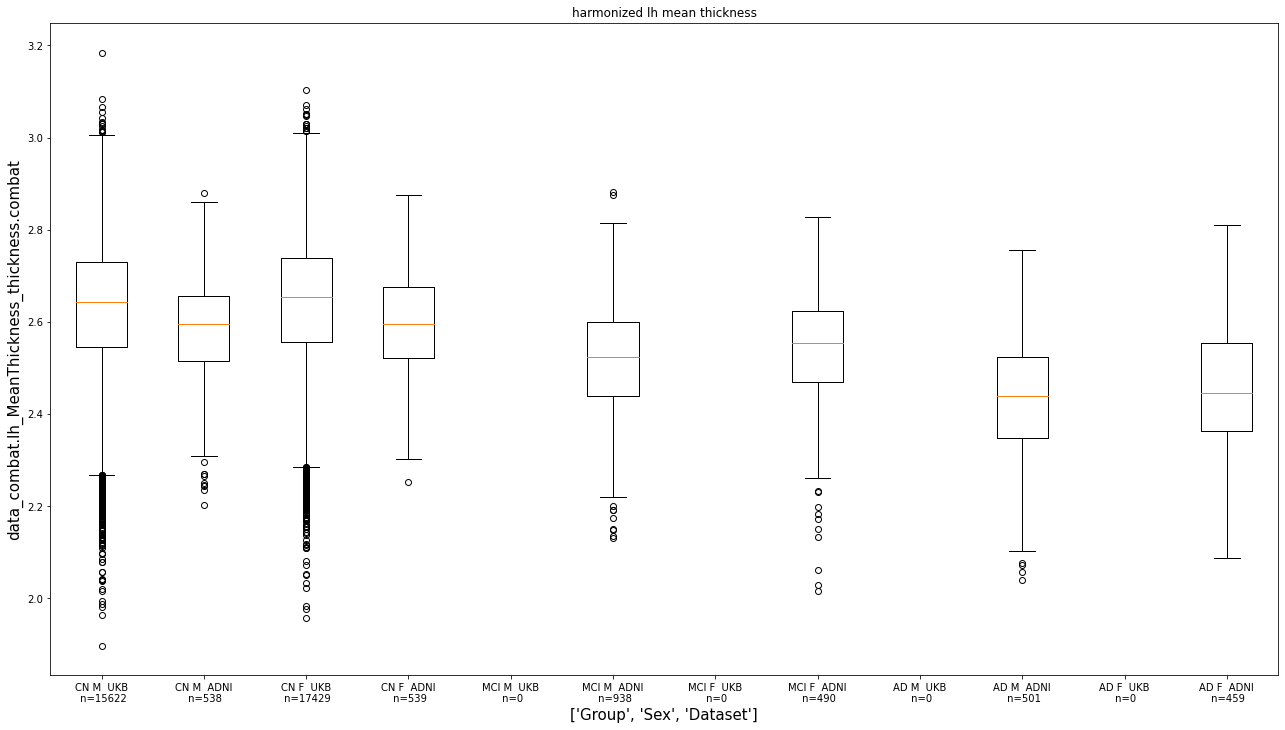

In [83]:
plt.rcParams['figure.figsize'] = (22,12)
plt.title("Harmonized lh_MeanThickness_thickness")
make_box_plot3x(all_merged, ['Group', 'Sex', 'Dataset'], 'data_combat.lh_MeanThickness_thickness.combat')
plt.title("harmonized lh mean thickness")

Text(0.5, 1.0, 'Harmonized LH Entorhinal Thickness')

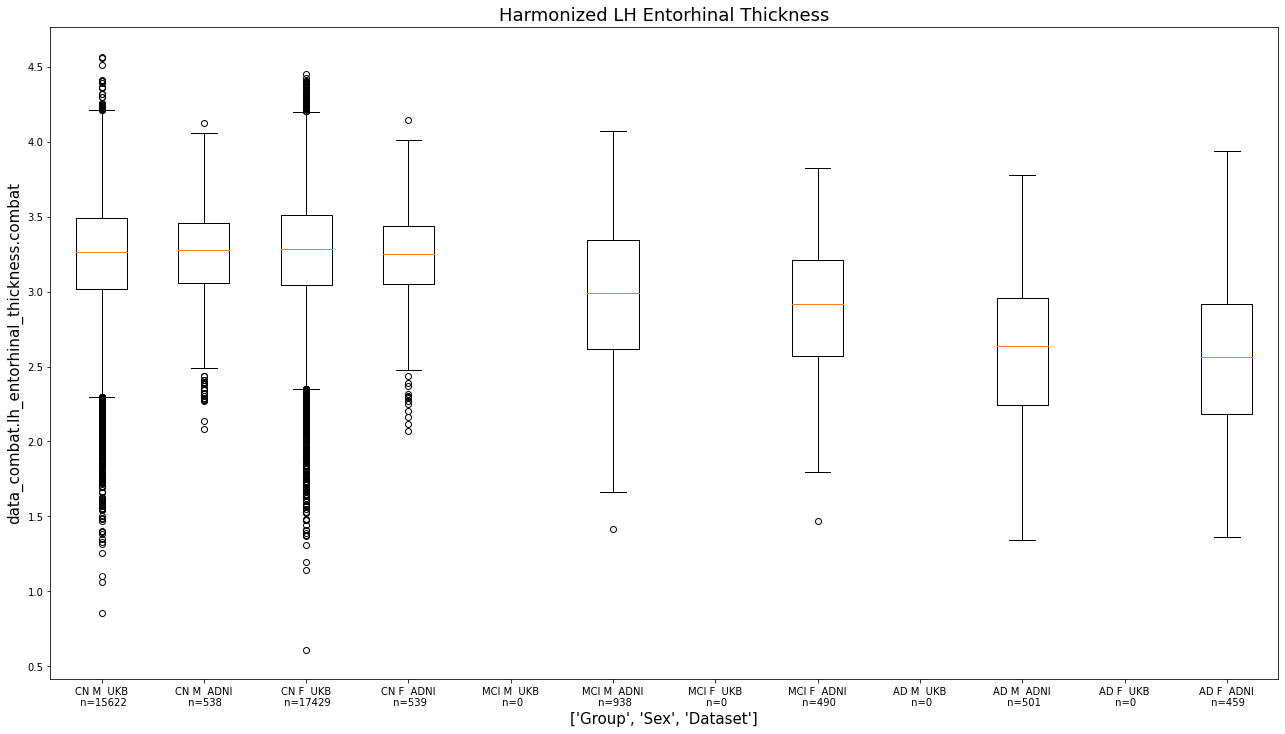

In [85]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.lh_entorhinal_thickness.combat')
plt.title('Harmonized LH Entorhinal Thickness', fontsize=18)

Text(0.5, 1.0, 'Harmonized RH Entorhinal Thickness')

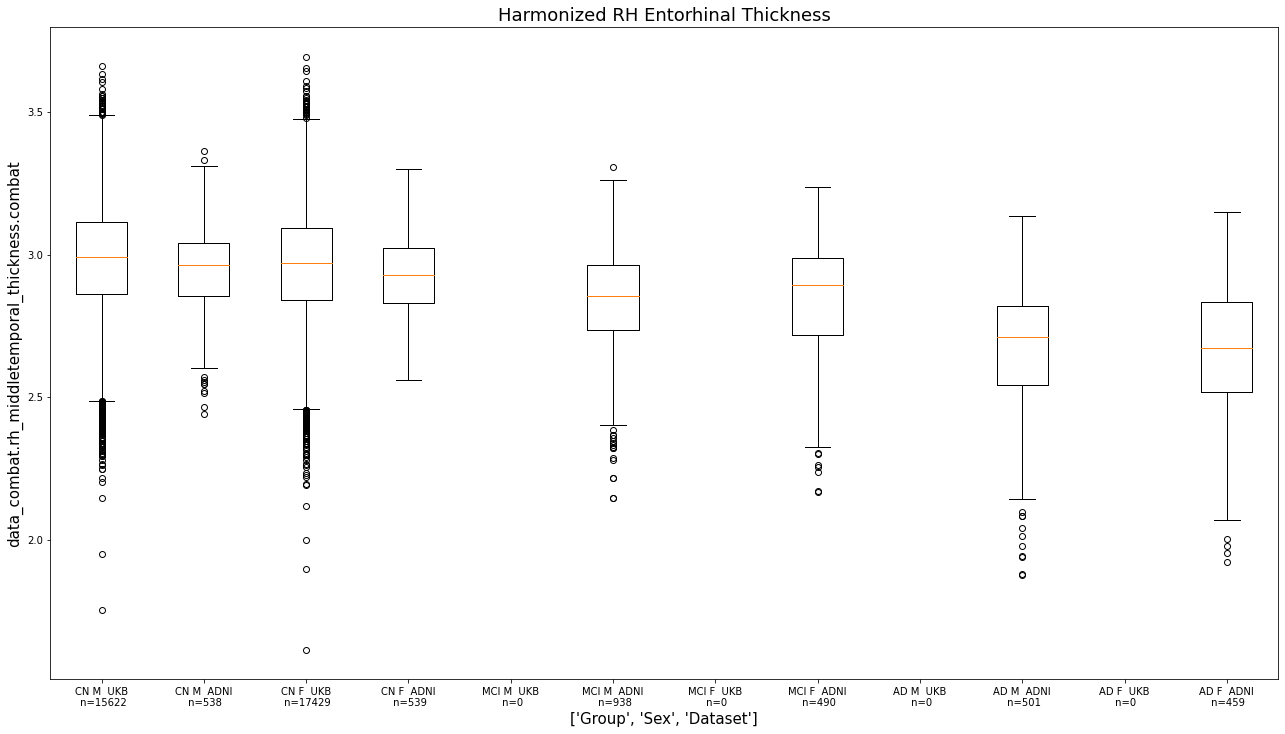

In [86]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.rh_middletemporal_thickness.combat')
plt.title('Harmonized RH Entorhinal Thickness', fontsize=18)

Text(0.5, 1.0, 'Harmonized Left_Hippocampus Volume')

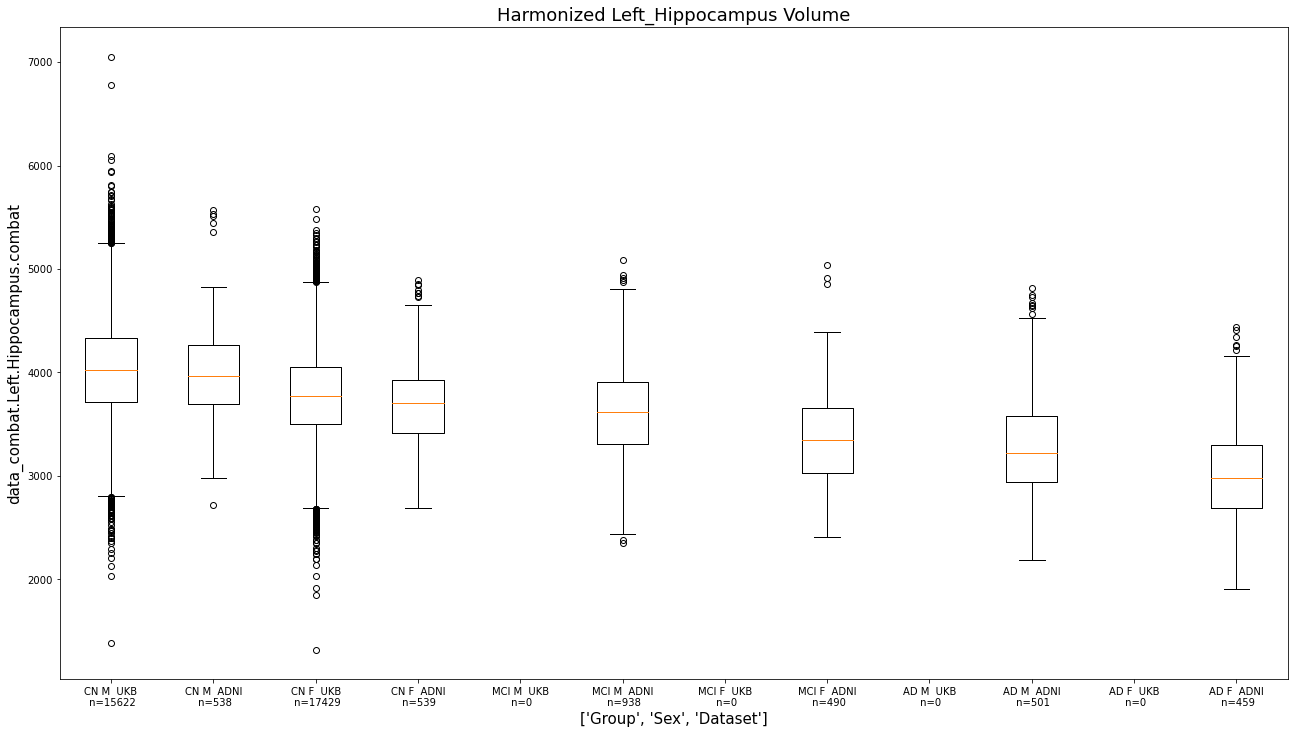

In [88]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.Left.Hippocampus.combat')
plt.title('Harmonized Left_Hippocampus Volume', fontsize=18)

Text(0.5, 1.0, 'Harmonized Right_Amygdala Volume')

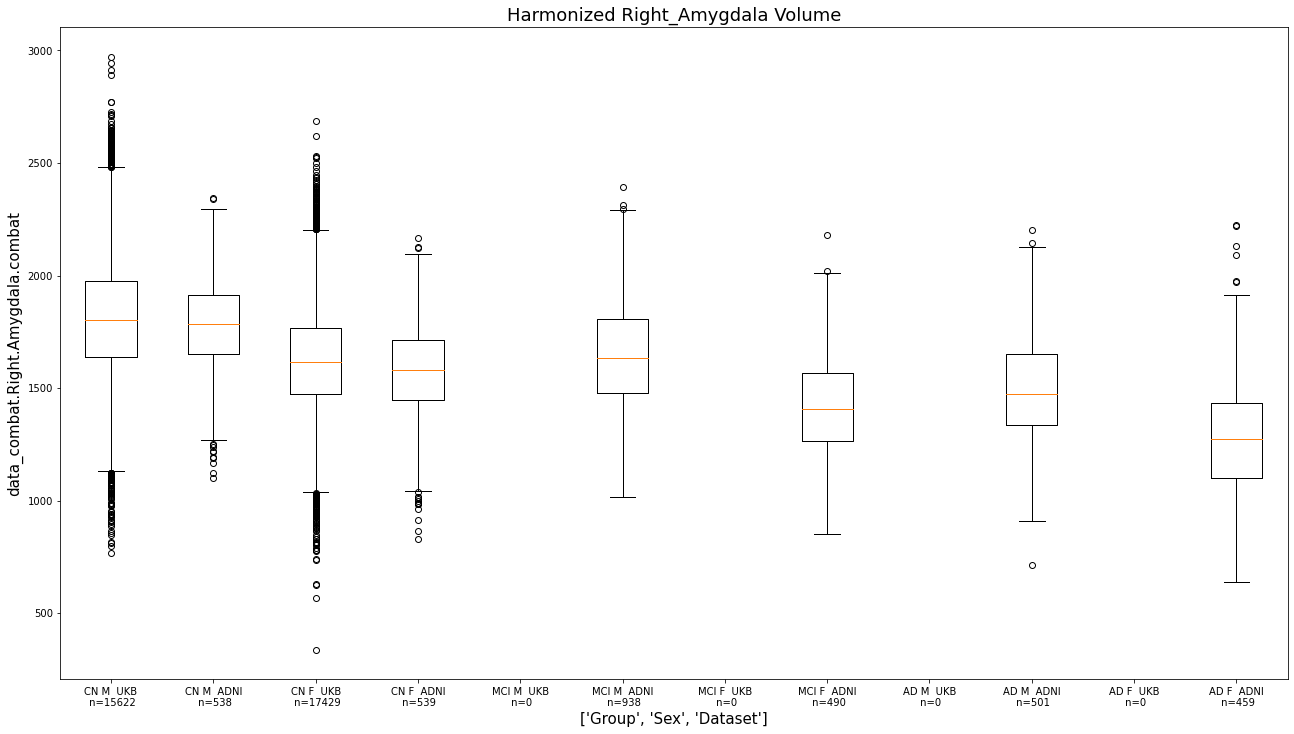

In [91]:
make_box_plot3x(all_merged, ['Group', 'Sex','Dataset'], 'data_combat.Right.Amygdala.combat')
plt.title('Harmonized Right_Amygdala Volume', fontsize=18)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
colors = np.random.rand(2)

In [105]:
list(all_merged.columns)

['Subject_ID',
 'Group',
 'Sex',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_super

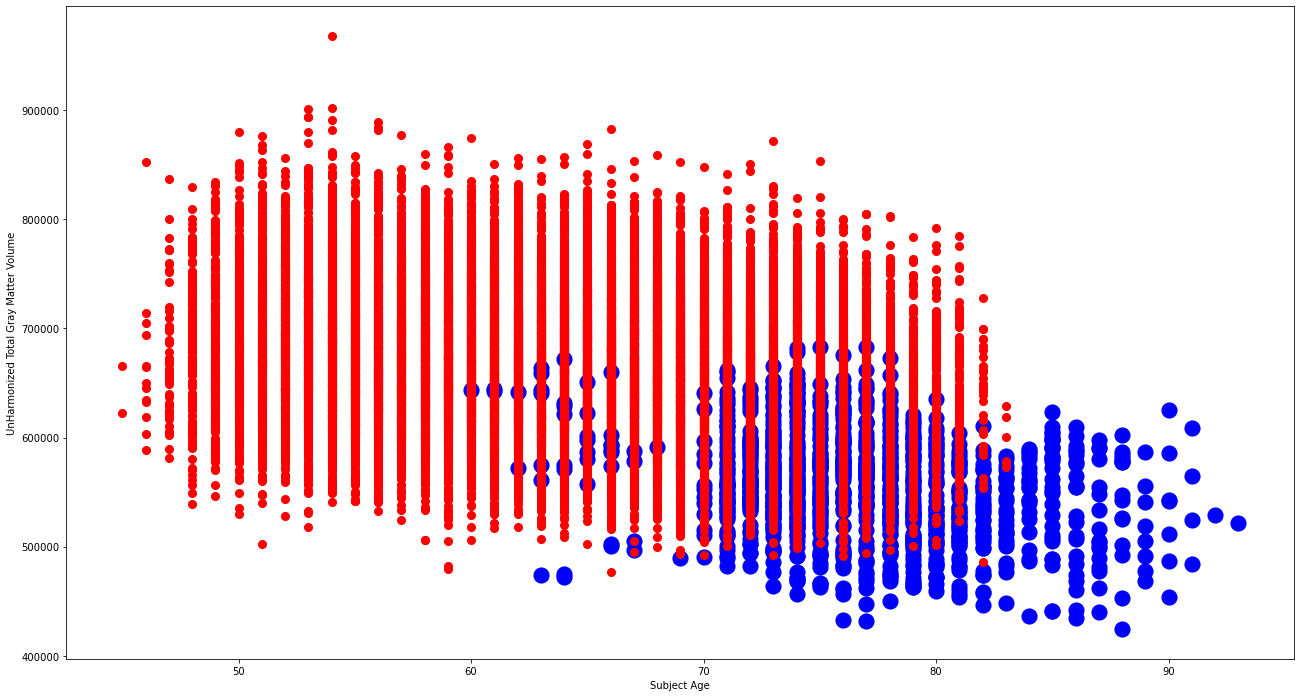

In [97]:
unharmonized_gmv_adni_df=all_merged[(all_merged.Dataset=="ADNI") & (all_merged.Group=="CN")][['Age','TotalGrayVol']]
unharmonized_gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','TotalGrayVol']]

plt.scatter(unharmonized_gmv_adni_df.Age,unharmonized_gmv_adni_df['TotalGrayVol'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(unharmonized_gmv_ukb_df.Age, unharmonized_gmv_ukb_df['TotalGrayVol'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Total Gray Matter Volume")
plt.show()

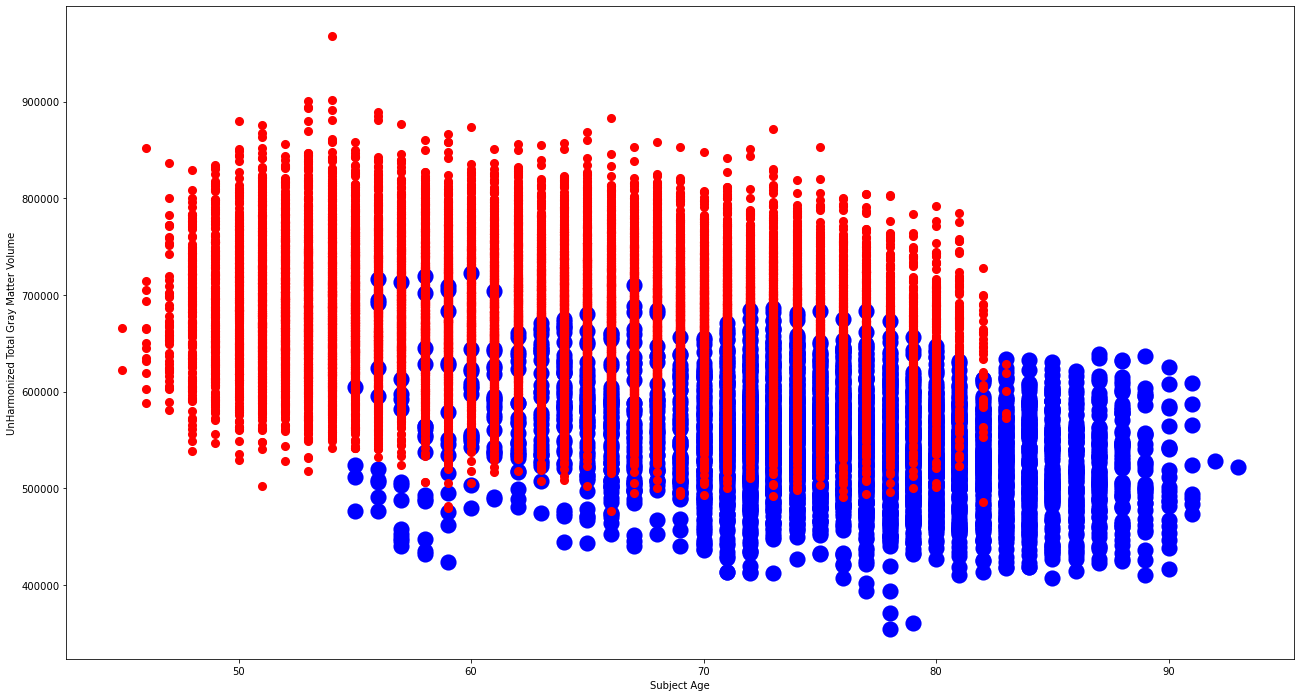

In [98]:
unharmonized_gmv_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','TotalGrayVol']]
unharmonized_gmv_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','TotalGrayVol']]

plt.scatter(unharmonized_gmv_adni_df.Age,unharmonized_gmv_adni_df['TotalGrayVol'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(unharmonized_gmv_ukb_df.Age, unharmonized_gmv_ukb_df['TotalGrayVol'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Total Gray Matter Volume")
plt.show()

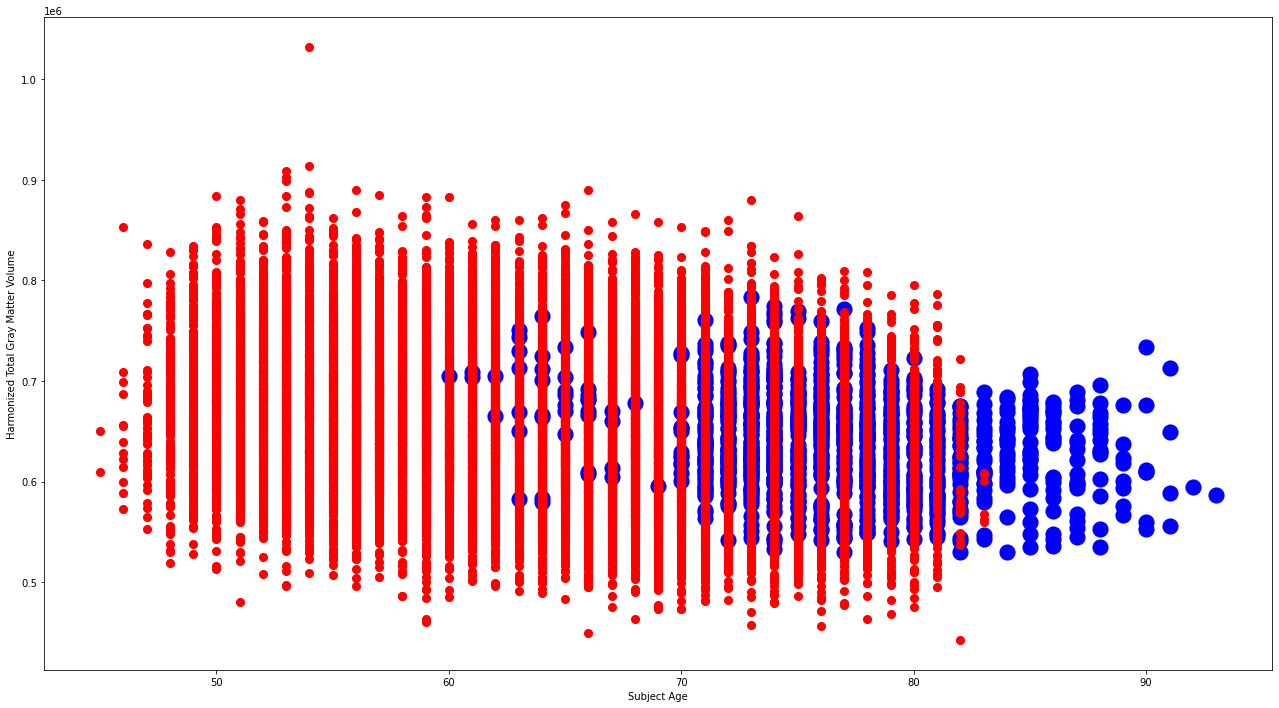

In [99]:
# gmv_adni_df,gmv_ukb_df
plt.scatter(gmv_adni_df.Age,gmv_adni_df['data_combat.TotalGrayVol.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(gmv_ukb_df.Age, gmv_ukb_df['data_combat.TotalGrayVol.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized Total Gray Matter Volume")
plt.show()

In [100]:
lh_mean_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','lh_MeanThickness_thickness','data_combat.lh_MeanThickness_thickness.combat']]     
lh_mean_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','lh_MeanThickness_thickness','data_combat.lh_MeanThickness_thickness.combat']]

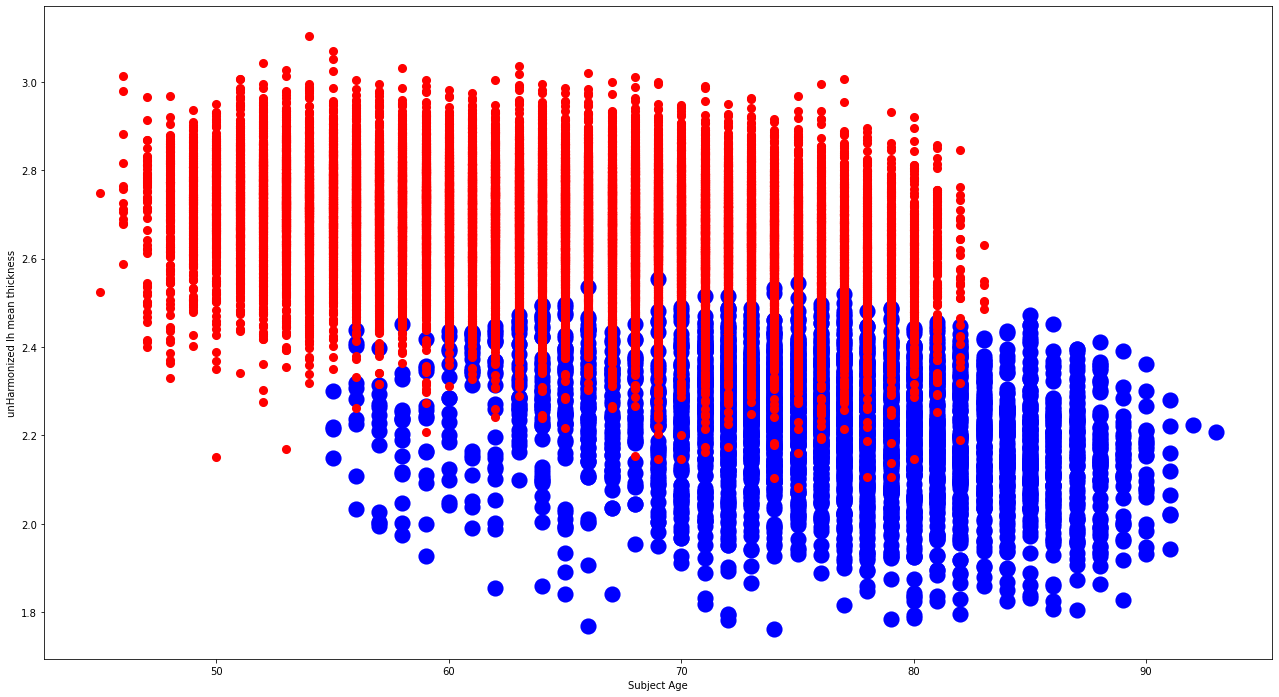

In [101]:
plt.scatter(lh_mean_adni_df.Age,lh_mean_adni_df['lh_MeanThickness_thickness'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(lh_mean_ukb_df.Age, lh_mean_ukb_df['lh_MeanThickness_thickness'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("unHarmonized lh mean thickness")
plt.show()

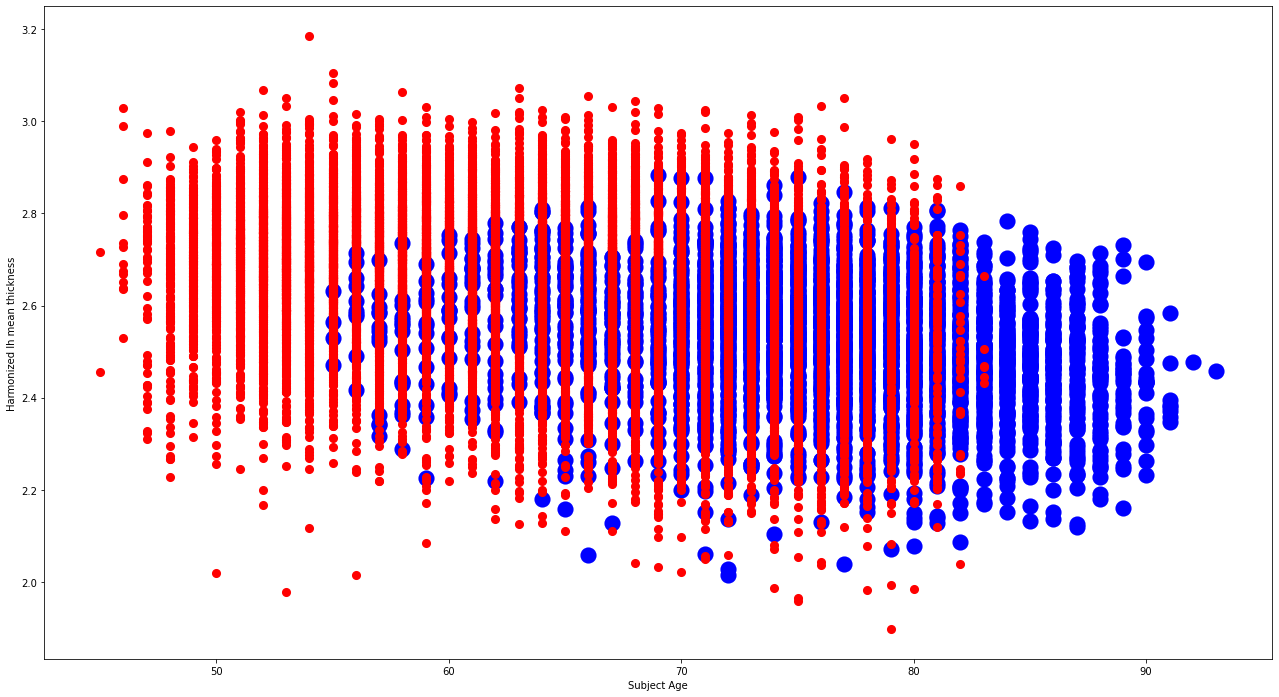

In [102]:
plt.scatter(lh_mean_adni_df.Age,lh_mean_adni_df['data_combat.lh_MeanThickness_thickness.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(lh_mean_ukb_df.Age, lh_mean_ukb_df['data_combat.lh_MeanThickness_thickness.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized lh mean thickness")
plt.show()

In [107]:
rm_adni_df=all_merged[all_merged.Dataset=="ADNI"][['Age','Right-Amygdala','data_combat.Right.Amygdala.combat']]     
rm_ukb_df=all_merged[all_merged.Dataset=="UKB"][['Age','Right-Amygdala','data_combat.Right.Amygdala.combat']]

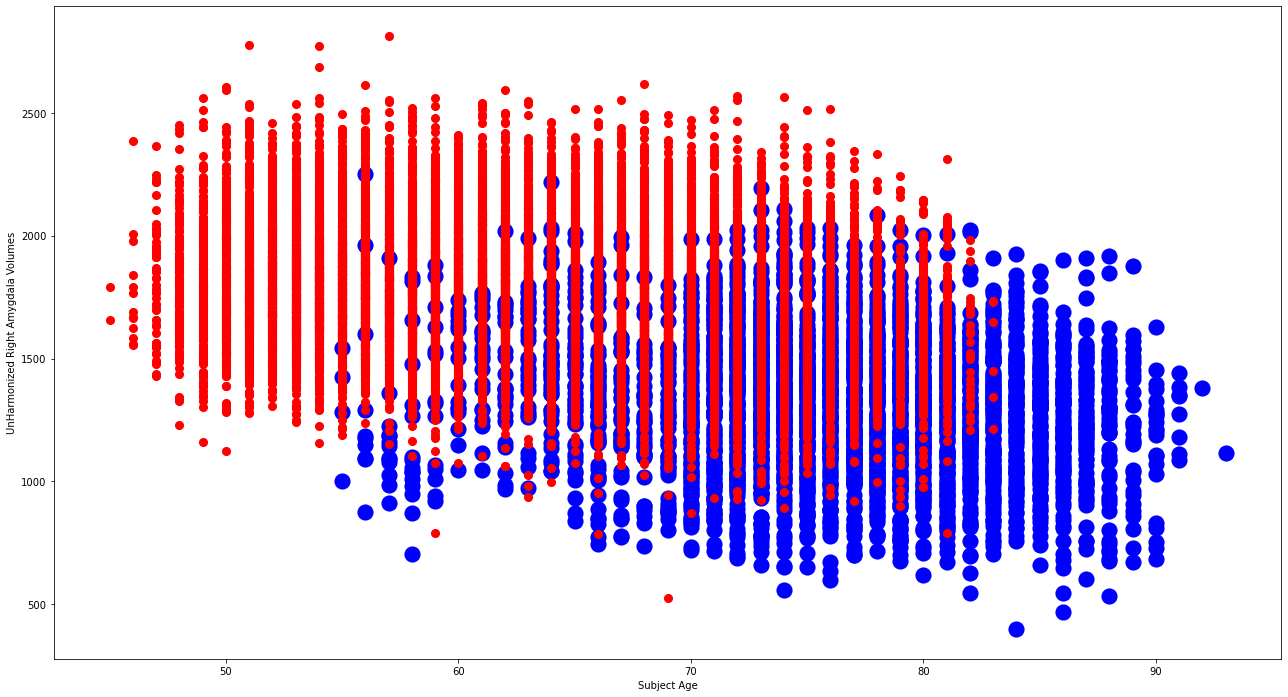

In [109]:
plt.scatter(rm_adni_df.Age,rm_adni_df['Right-Amygdala'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(rm_ukb_df.Age, rm_ukb_df['Right-Amygdala'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("UnHarmonized Right Amygdala Volumes")
plt.show()

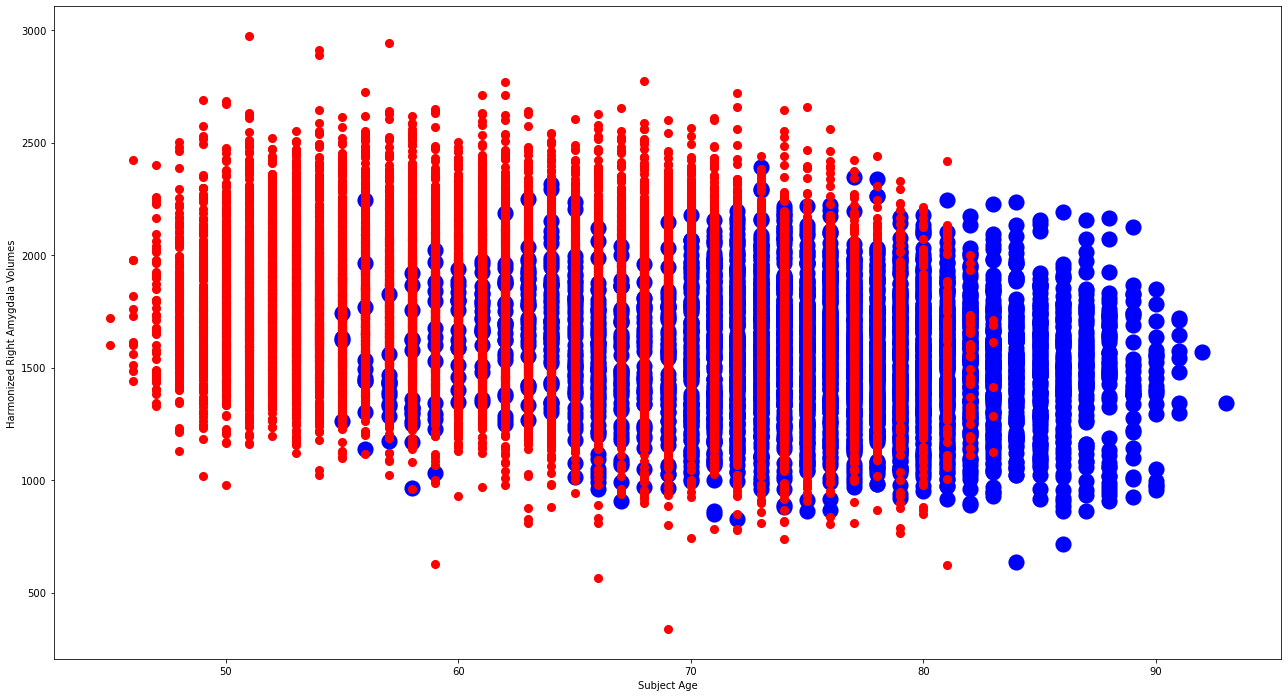

In [111]:
plt.scatter(rm_adni_df.Age,rm_adni_df['data_combat.Right.Amygdala.combat'].values, c ="blue",linewidths = 2,s = 200)
plt.scatter(rm_ukb_df.Age, rm_ukb_df['data_combat.Right.Amygdala.combat'].values, c ="red",linewidths = 2,s = 50)

plt.xlabel("Subject Age")
plt.ylabel("Harmonized Right Amygdala Volumes")
plt.show()

In [55]:
#20023 Mean time to correctly identify matches
#20016 Fluid intelligence score
#4080 Blood_Pressure
relevant_cols=["eid","20016-0.0","20016-1.0","20016-2.0","20016-3.0","20023-0.0","20023-1.0","20023-2.0","20023-3.0","4080-0.0","4080-0.1","4080-1.0","4080-1.1","4080-2.0","4080-2.1","4080-3.0","4080-3.1"]
meta_data_df = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb49570.csv", usecols = relevant_cols)

In [56]:
meta_data_df.shape

(502417, 17)

In [57]:
meta_data_df.columns

Index(['eid', '4080-0.0', '4080-0.1', '4080-1.0', '4080-1.1', '4080-2.0',
       '4080-2.1', '4080-3.0', '4080-3.1', '20016-0.0', '20016-1.0',
       '20016-2.0', '20016-3.0', '20023-0.0', '20023-1.0', '20023-2.0',
       '20023-3.0'],
      dtype='object')

In [58]:
brain_df=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb_brain_imaging_metadata.csv")

brain_imaging_subjects = list(brain_df['eid'].unique())

In [59]:
meta_data_df = meta_data_df[meta_data_df['eid'].isin(brain_imaging_subjects)]

In [60]:
meta_data_df.shape

(49400, 17)

In [61]:
changes = {}
for colname in meta_data_df.columns:
    if colname[:4] == "4080":
        changes[colname] = colname.replace('4080','Blood_Pressure')
    elif colname[:5] == "20016":
        changes[colname] = colname.replace('20016','Fluid_Intelligence_Score')
    elif colname[:5] == "20023":
        changes[colname] = colname.replace('20023','Mean_time_matrix_completion')
    elif colname=="eid":
        changes[colname] = "Subject_ID"
meta_data_df=meta_data_df.rename(changes, axis=1)

In [62]:
meta_data_df.head(10)

,Subject_ID,Blood_Pressure-0.0,Blood_Pressure-0.1,Blood_Pressure-1.0,Blood_Pressure-1.1,Blood_Pressure-2.0,Blood_Pressure-2.1,Blood_Pressure-3.0,Blood_Pressure-3.1,Fluid_Intelligence_Score-0.0,Fluid_Intelligence_Score-1.0,Fluid_Intelligence_Score-2.0,Fluid_Intelligence_Score-3.0,Mean_time_matrix_completion-0.0,Mean_time_matrix_completion-1.0,Mean_time_matrix_completion-2.0,Mean_time_matrix_completion-3.0
27,1000286,127.0,117.0,135.0,127.0,145.0,NaN,NaN,NaN,7.0,6.0,NaN,NaN,570.0,535.0,NaN,NaN
28,1000295,152.0,NaN,NaN,NaN,139.0,115.0,155.0,160.0,11.0,NaN,NaN,11.0,457.0,NaN,NaN,476.0
32,1000335,115.0,117.0,NaN,NaN,120.0,115.0,NaN,NaN,NaN,NaN,5.0,NaN,578.0,NaN,554.0,NaN
38,1000397,173.0,154.0,NaN,NaN,139.0,117.0,NaN,NaN,7.0,NaN,6.0,NaN,613.0,NaN,584.0,NaN
42,1000432,131.0,119.0,NaN,NaN,135.0,137.0,NaN,NaN,8.0,NaN,7.0,NaN,429.0,NaN,600.0,NaN
57,1000580,119.0,112.0,NaN,NaN,108.0,116.0,NaN,NaN,NaN,NaN,8.0,NaN,399.0,NaN,503.0,NaN
58,1000591,110.0,112.0,NaN,NaN,148.0,135.0,NaN,NaN,7.0,NaN,9.0,NaN,617.0,NaN,507.0,NaN
72,1000730,119.0,117.0,NaN,NaN,133.0,127.0,NaN,NaN,NaN,NaN,8.0,NaN,453.0,NaN,570.0,NaN
87,1000882,122.0,126.0,NaN,NaN,134.0,133.0,NaN,NaN,10.0,NaN,7.0,NaN,386.0,NaN,510.0,NaN
93,1000946,122.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,688.0,NaN,690.0,NaN


In [63]:
meta_data_df.describe()

,Subject_ID,Blood_Pressure-0.0,Blood_Pressure-0.1,Blood_Pressure-1.0,Blood_Pressure-1.1,Blood_Pressure-2.0,Blood_Pressure-2.1,Blood_Pressure-3.0,Blood_Pressure-3.1,Fluid_Intelligence_Score-0.0,Fluid_Intelligence_Score-1.0,Fluid_Intelligence_Score-2.0,Fluid_Intelligence_Score-3.0,Mean_time_matrix_completion-0.0,Mean_time_matrix_completion-1.0,Mean_time_matrix_completion-2.0,Mean_time_matrix_completion-3.0
count,4.940000e+04,45924.000000,45203.000000,8274.000000,8270.000000,39545.000000,38880.000000,4878.000000,4879.000000,16555.000000,8289.000000,45038.000000,4250.000000,49259.000000,8310.000000,45614.000000,4261.000000
mean,3.513657e+06,137.206188,133.586753,140.335267,134.596856,141.419016,136.710057,143.697827,138.488830,6.672788,6.816624,6.574426,6.743294,539.367831,546.582070,597.346363,590.561840
std,1.447711e+06,18.866900,17.871576,19.398796,17.998622,19.990151,18.681079,20.014013,18.840014,2.040257,2.033956,2.063807,1.992392,101.327939,103.493629,110.964967,107.219247
min,1.000286e+06,69.000000,78.000000,80.000000,75.000000,78.000000,69.000000,58.000000,88.000000,0.000000,0.000000,0.000000,0.000000,297.000000,316.000000,150.000000,172.000000
25%,2.265083e+06,124.000000,121.000000,127.000000,122.000000,127.000000,124.000000,130.000000,125.000000,5.000000,5.000000,5.000000,5.000000,469.000000,476.000000,522.000000,518.000000
50%,3.511178e+06,136.000000,132.000000,139.000000,133.000000,140.000000,135.000000,142.000000,137.000000,7.000000,7.000000,7.000000,7.000000,520.000000,528.000000,578.000000,574.000000
75%,4.764415e+06,149.000000,145.000000,153.000000,146.000000,154.000000,148.000000,157.000000,150.000000,8.000000,8.000000,8.000000,8.000000,586.000000,598.000000,651.000000,644.000000
max,6.025586e+06,248.000000,253.000000,229.000000,231.000000,252.000000,237.000000,243.000000,231.000000,13.000000,13.000000,13.000000,13.000000,1726.000000,1468.000000,1809.000000,1587.000000


In [101]:
meta_data_df.count()

Subject_ID                         49400
Blood_Pressure-0.0                 45924
Blood_Pressure-0.1                 45203
Blood_Pressure-1.0                  8274
Blood_Pressure-1.1                  8270
Blood_Pressure-2.0                 39545
Blood_Pressure-2.1                 38880
Blood_Pressure-3.0                  4878
Blood_Pressure-3.1                  4879
Fluid_Intelligence_Score-0.0       16555
Fluid_Intelligence_Score-1.0        8289
Fluid_Intelligence_Score-2.0       45038
Fluid_Intelligence_Score-3.0        4250
Mean_time_matrix_completion-0.0    49259
Mean_time_matrix_completion-1.0     8310
Mean_time_matrix_completion-2.0    45614
Mean_time_matrix_completion-3.0     4261
dtype: int64

## Regression Modelling on Age

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
harmonized_df = pd.read_csv(ukb_adni_directory_path+"harmonized_adni6_ukb_May2022.csv")
harmonized_df = harmonized_df.drop('Unnamed: 0', 1)
unharmonized_df=pd.read_csv(ukb_adni_directory_path+"adni_6_ukb_stacked_may2022.csv")

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
harmonized_df.index=unharmonized_df.index
all_merged = unharmonized_df.join(harmonized_df)

In [132]:
list(all_merged.columns)[145:]

['data_combat.lh_bankssts_thickness.combat',
 'data_combat.lh_caudalanteriorcingulate_thickness.combat',
 'data_combat.lh_caudalmiddlefrontal_thickness.combat',
 'data_combat.lh_cuneus_thickness.combat',
 'data_combat.lh_entorhinal_thickness.combat',
 'data_combat.lh_fusiform_thickness.combat',
 'data_combat.lh_inferiorparietal_thickness.combat',
 'data_combat.lh_inferiortemporal_thickness.combat',
 'data_combat.lh_isthmuscingulate_thickness.combat',
 'data_combat.lh_lateraloccipital_thickness.combat',
 'data_combat.lh_lateralorbitofrontal_thickness.combat',
 'data_combat.lh_lingual_thickness.combat',
 'data_combat.lh_medialorbitofrontal_thickness.combat',
 'data_combat.lh_middletemporal_thickness.combat',
 'data_combat.lh_parahippocampal_thickness.combat',
 'data_combat.lh_paracentral_thickness.combat',
 'data_combat.lh_parsopercularis_thickness.combat',
 'data_combat.lh_parsorbitalis_thickness.combat',
 'data_combat.lh_parstriangularis_thickness.combat',
 'data_combat.lh_pericalcarin

In [120]:
list(all_merged.columns)[6:]

['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness'

In [117]:
#all_merged=all_merged.drop([6:131])
# all_merged.drop(all_merged.iloc[:, 6:131], inplace = True, axis = 1)
# all_merged.drop(all_merged.iloc[:, 6:8], inplace = True, axis = 1)
# all_merged=all_merged.drop(['data_combat.Scanner_Proxy'], axis = 1)
# category_dummies=pd.get_dummies(all_merged[['Sex']],prefix=['Sex'])
# all_merged=pd.concat([all_merged,category_dummies],axis=1).drop(['Sex'],axis=1)
# category_dummies=pd.get_dummies(all_merged[['Scanner_Proxy']],prefix=['Scanner_Proxy'])
# all_merged=pd.concat([all_merged,category_dummies],axis=1).drop(['Scanner_Proxy'],axis=1)

In [118]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_val, y_train, y_val = train_test_split(all_merged.iloc[:,6:141],all_merged['Age'],
test_size=0.2,
random_state=1)

In [125]:
len(x_val)

7304

In [127]:
reg_model = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=500)
reg_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=0)

In [129]:
from sklearn import metrics
predictions=reg_model.predict(x_val)

In [130]:
metrics.mean_squared_error(y_val, predictions)

32.38873297736733

In [133]:
x_train, x_val, y_train, y_val = train_test_split(all_merged.iloc[:,145:],all_merged['Age'],
test_size=0.2,
random_state=1)

In [134]:
reg_model_harmonized = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=500)
reg_model_harmonized.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=0)

In [135]:
predictions_harmonized=reg_model_harmonized.predict(x_val)

In [136]:
metrics.mean_squared_error(y_val, predictions_harmonized)

42.35588280610599

## Psuedo AD Fields

In [3]:
import pandas as pd
brain_df=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb_brain_imaging_metadata.csv")
brain_imaging_subjects = list(brain_df['eid'].unique())

In [4]:
len(brain_imaging_subjects)

49400

In [5]:
icd_10_fields="41270-0.0,41270-0.1,41270-0.2,41270-0.3,41270-0.4,41270-0.5,41270-0.6,41270-0.7,41270-0.8,41270-0.9,41270-0.10,41270-0.11,41270-0.12,41270-0.13,41270-0.14,41270-0.15,41270-0.16,41270-0.17,41270-0.18,41270-0.19,41270-0.20,41270-0.21,41270-0.22,41270-0.23,41270-0.24,41270-0.25,41270-0.26,41270-0.27,41270-0.28,41270-0.29,41270-0.30,41270-0.31,41270-0.32,41270-0.33,41270-0.34,41270-0.35,41270-0.36,41270-0.37,41270-0.38,41270-0.39,41270-0.40,41270-0.41,41270-0.42,41270-0.43,41270-0.44,41270-0.45,41270-0.46,41270-0.47,41270-0.48,41270-0.49,41270-0.50,41270-0.51,41270-0.52,41270-0.53,41270-0.54,41270-0.55,41270-0.56,41270-0.57,41270-0.58,41270-0.59,41270-0.60,41270-0.61,41270-0.62,41270-0.63,41270-0.64,41270-0.65,41270-0.66,41270-0.67,41270-0.68,41270-0.69,41270-0.70,41270-0.71,41270-0.72,41270-0.73,41270-0.74,41270-0.75,41270-0.76,41270-0.77,41270-0.78,41270-0.79,41270-0.80,41270-0.81,41270-0.82,41270-0.83,41270-0.84,41270-0.85,41270-0.86,41270-0.87,41270-0.88,41270-0.89,41270-0.90,41270-0.91,41270-0.92,41270-0.93,41270-0.94,41270-0.95,41270-0.96,41270-0.97,41270-0.98,41270-0.99,41270-0.100,41270-0.101,41270-0.102,41270-0.103,41270-0.104,41270-0.105,41270-0.106,41270-0.107,41270-0.108,41270-0.109,41270-0.110,41270-0.111,41270-0.112,41270-0.113,41270-0.114,41270-0.115,41270-0.116,41270-0.117,41270-0.118,41270-0.119,41270-0.120,41270-0.121,41270-0.122,41270-0.123,41270-0.124,41270-0.125,41270-0.126,41270-0.127,41270-0.128,41270-0.129,41270-0.130,41270-0.131,41270-0.132,41270-0.133,41270-0.134,41270-0.135,41270-0.136,41270-0.137,41270-0.138,41270-0.139,41270-0.140,41270-0.141,41270-0.142,41270-0.143,41270-0.144,41270-0.145,41270-0.146,41270-0.147,41270-0.148,41270-0.149,41270-0.150,41270-0.151,41270-0.152,41270-0.153,41270-0.154,41270-0.155,41270-0.156,41270-0.157,41270-0.158,41270-0.159,41270-0.160,41270-0.161,41270-0.162,41270-0.163,41270-0.164,41270-0.165,41270-0.166,41270-0.167,41270-0.168,41270-0.169,41270-0.170,41270-0.171,41270-0.172,41270-0.173,41270-0.174,41270-0.175,41270-0.176,41270-0.177,41270-0.178,41270-0.179,41270-0.180,41270-0.181,41270-0.182,41270-0.183,41270-0.184,41270-0.185,41270-0.186,41270-0.187,41270-0.188,41270-0.189,41270-0.190,41270-0.191,41270-0.192,41270-0.193,41270-0.194,41270-0.195,41270-0.196,41270-0.197,41270-0.198,41270-0.199,41270-0.200,41270-0.201,41270-0.202,41270-0.203,41270-0.204,41270-0.205,41270-0.206,41270-0.207,41270-0.208,41270-0.209,41270-0.210,41270-0.211,41270-0.212,41270-0.213,41270-0.214,41270-0.215,41270-0.216,41270-0.217,41270-0.218,41270-0.219,41270-0.220,41270-0.221,41270-0.222,41270-0.223,41270-0.224,41270-0.225" 

icd_10_field_list=icd_10_fields.split(",")

In [10]:
icd_10_field_list.insert(0, "eid")

In [11]:
icd_10_field_list

['eid',
 '41270-0.0',
 '41270-0.1',
 '41270-0.2',
 '41270-0.3',
 '41270-0.4',
 '41270-0.5',
 '41270-0.6',
 '41270-0.7',
 '41270-0.8',
 '41270-0.9',
 '41270-0.10',
 '41270-0.11',
 '41270-0.12',
 '41270-0.13',
 '41270-0.14',
 '41270-0.15',
 '41270-0.16',
 '41270-0.17',
 '41270-0.18',
 '41270-0.19',
 '41270-0.20',
 '41270-0.21',
 '41270-0.22',
 '41270-0.23',
 '41270-0.24',
 '41270-0.25',
 '41270-0.26',
 '41270-0.27',
 '41270-0.28',
 '41270-0.29',
 '41270-0.30',
 '41270-0.31',
 '41270-0.32',
 '41270-0.33',
 '41270-0.34',
 '41270-0.35',
 '41270-0.36',
 '41270-0.37',
 '41270-0.38',
 '41270-0.39',
 '41270-0.40',
 '41270-0.41',
 '41270-0.42',
 '41270-0.43',
 '41270-0.44',
 '41270-0.45',
 '41270-0.46',
 '41270-0.47',
 '41270-0.48',
 '41270-0.49',
 '41270-0.50',
 '41270-0.51',
 '41270-0.52',
 '41270-0.53',
 '41270-0.54',
 '41270-0.55',
 '41270-0.56',
 '41270-0.57',
 '41270-0.58',
 '41270-0.59',
 '41270-0.60',
 '41270-0.61',
 '41270-0.62',
 '41270-0.63',
 '41270-0.64',
 '41270-0.65',
 '41270-0.66

In [28]:
idc_10_df=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb49572.csv",usecols=icd_10_field_list)

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
idc_10_df = idc_10_df[idc_10_df['eid'].isin(brain_imaging_subjects)]

In [30]:
idc_10_df.head(20)

,eid,41270-0.0,41270-0.1,41270-0.2,41270-0.3,41270-0.4,41270-0.5,41270-0.6,41270-0.7,41270-0.8,...,41270-0.216,41270-0.217,41270-0.218,41270-0.219,41270-0.220,41270-0.221,41270-0.222,41270-0.223,41270-0.224,41270-0.225
27,1000286,D120,K221,K296,K30,K409,K449,K625,K635,K638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1000295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1000335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,1000397,E119,I10,K573,K620,N63,R002,R42,R529,R634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1000432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,1000580,D235,D236,J301,J459,N871,O049,R69,R877,Z860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,1000591,A084,E86,I420,I459,I48,I501,I849,K589,K601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,1000730,F171,I499,K529,R002,R074,Z302,Z720,Z824,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,1000882,D649,K635,R194,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,1000946,K590,N328,N604,N908,R234,Z538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
idc_10_df.shape

(49400, 227)

In [32]:
idc_10_df.count()

eid            49400
41270-0.0      41504
41270-0.1      37371
41270-0.2      33411
41270-0.3      29702
               ...  
41270-0.221        0
41270-0.222        0
41270-0.223        0
41270-0.224        0
41270-0.225        0
Length: 227, dtype: int64

In [33]:
idc_10_df.to_csv("idc10_ukb.csv")

## Classifcation Model for Subject's Group

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [6]:
harmonized_df.head(20)

,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,data_combat.lh_inferiorparietal_thickness.combat,...,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.SupraTentorialVolNotVentVox.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol.to.eTIV.combat,data_combat.MaskVol.to.eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1000295,2017-10-27,Newcastle,2.296284,1.178939,2.276881,2.015306,3.044882,2.892787,2.501170,...,718072.352420,86726.540546,822884.151319,1.401979e+06,1.363809e+06,1.358895e+06,1.963492e+06,0.967215,1.195924,1.546517e+06
1,1000397,2018-03-07,Newcastle,2.500101,2.969933,2.990356,1.886608,3.656489,2.944818,2.794912,...,458285.797056,53041.117324,639324.340096,1.039510e+06,9.951820e+05,9.904603e+05,1.562235e+06,0.774657,1.028857,1.517763e+06
2,1000432,2018-07-14,Cheadle,2.734754,3.305112,2.774210,1.966005,3.201053,2.943196,2.642145,...,510200.433871,55275.471305,667856.449483,1.085389e+06,1.059081e+06,1.054203e+06,1.609321e+06,0.831234,1.079333,1.498252e+06
3,1000591,2019-07-09,Reading,2.779423,2.344385,3.093786,2.079017,3.275997,3.038995,2.591875,...,557101.565580,64589.102686,754345.174149,1.203525e+06,1.179758e+06,1.177390e+06,1.834101e+06,0.806057,1.083917,1.700009e+06
4,1000882,2017-11-16,Cheadle,2.448656,2.768825,2.991334,1.804743,3.340516,2.790543,2.651284,...,654223.943732,66444.846520,743922.205485,1.296093e+06,1.269282e+06,1.264942e+06,1.865044e+06,0.789774,1.006210,1.843770e+06
5,1001753,2016-10-11,Cheadle,2.266425,2.746544,2.114938,1.805690,3.626401,2.725540,2.274354,...,440181.201401,50057.202001,558824.943815,9.109707e+05,9.018087e+05,8.985207e+05,1.413586e+06,0.770041,1.047970,1.353521e+06
6,1002306,2018-10-01,Newcastle,2.845513,3.374096,2.728517,1.891444,4.054655,3.134218,2.671693,...,441205.851151,51001.626943,656200.138568,9.752165e+05,9.620527e+05,9.574753e+05,1.559258e+06,0.775479,1.059837,1.478871e+06
7,1002603,2019-09-14,Newcastle,2.554731,2.960622,2.948262,1.849877,3.276361,3.003979,2.610969,...,474546.750793,57448.602639,645919.571589,1.033871e+06,1.020246e+06,1.017081e+06,1.640832e+06,0.770955,1.101555,1.506233e+06
8,1002719,2018-11-28,Newcastle,2.492125,2.804297,2.730536,1.960962,3.302827,2.856614,2.642916,...,406217.292604,50477.880024,581214.030771,9.055925e+05,8.920266e+05,8.891153e+05,1.364899e+06,0.787828,1.029841,1.326430e+06
9,1002824,2018-08-05,Newcastle,2.810585,2.674610,2.854635,2.082439,2.946680,3.056149,2.496332,...,367607.509974,48916.108297,599633.353351,8.953987e+05,8.658240e+05,8.634906e+05,1.393518e+06,0.752980,1.014998,1.369920e+06


In [5]:
harmonized_df=pd.read_csv("/ocean/projects/asc170022p/tighu/ADNI_UKB_Harmonization_May_2022/harmonized_adni6_ukb_May2022.csv")
harmonized_df = harmonized_df.drop('Unnamed: 0', 1)
unharmonized_df=pd.read_csv("/ocean/projects/asc170022p/tighu/ADNI_UKB_Harmonization_May_2022/adni_6_ukb_stacked_may2022.csv")

harmonized_df.index=unharmonized_df.index
all_merged = unharmonized_df.join(harmonized_df)

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
cols = [x for x in range(6,141)]
all_merged.drop(all_merged.columns[cols],axis=1,inplace=True)
category_dummies=pd.get_dummies(all_merged[['Sex']],prefix=['Sex'])
all_merged=pd.concat([all_merged,category_dummies],axis=1).drop(['Sex'],axis=1)

In [8]:
list(all_merged.columns)

['Subject_ID',
 'Group',
 'Age',
 'Date_of_Brain_Scan',
 'Scanner_Proxy',
 'Dataset',
 'data_combat.Subject_ID',
 'data_combat.Date_of_Brain_Scan',
 'data_combat.Scanner_Proxy',
 'data_combat.lh_bankssts_thickness.combat',
 'data_combat.lh_caudalanteriorcingulate_thickness.combat',
 'data_combat.lh_caudalmiddlefrontal_thickness.combat',
 'data_combat.lh_cuneus_thickness.combat',
 'data_combat.lh_entorhinal_thickness.combat',
 'data_combat.lh_fusiform_thickness.combat',
 'data_combat.lh_inferiorparietal_thickness.combat',
 'data_combat.lh_inferiortemporal_thickness.combat',
 'data_combat.lh_isthmuscingulate_thickness.combat',
 'data_combat.lh_lateraloccipital_thickness.combat',
 'data_combat.lh_lateralorbitofrontal_thickness.combat',
 'data_combat.lh_lingual_thickness.combat',
 'data_combat.lh_medialorbitofrontal_thickness.combat',
 'data_combat.lh_middletemporal_thickness.combat',
 'data_combat.lh_parahippocampal_thickness.combat',
 'data_combat.lh_paracentral_thickness.combat',
 'data

In [9]:
list(all_merged.columns)[6:9]

['data_combat.Subject_ID',
 'data_combat.Date_of_Brain_Scan',
 'data_combat.Scanner_Proxy']

In [10]:
cols= [6,7,8]
all_merged.drop(all_merged.columns[cols],axis=1,inplace=True)

In [11]:
all_merged['Dataset'].unique()

array(['UKB', 'ADNI'], dtype=object)

In [12]:
all_merged.head(20)

,Subject_ID,Group,Age,Date_of_Brain_Scan,Scanner_Proxy,Dataset,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,...,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.SupraTentorialVolNotVentVox.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol.to.eTIV.combat,data_combat.MaskVol.to.eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat,Sex_F,Sex_M
0,1000295,CN,59,2017-10-27,Newcastle,UKB,2.296284,1.178939,2.276881,2.015306,...,822884.151319,1.401979e+06,1.363809e+06,1.358895e+06,1.963492e+06,0.967215,1.195924,1.546517e+06,0,1
1,1000397,CN,59,2018-03-07,Newcastle,UKB,2.500101,2.969933,2.990356,1.886608,...,639324.340096,1.039510e+06,9.951820e+05,9.904603e+05,1.562235e+06,0.774657,1.028857,1.517763e+06,1,0
2,1000432,CN,62,2018-07-14,Cheadle,UKB,2.734754,3.305112,2.774210,1.966005,...,667856.449483,1.085389e+06,1.059081e+06,1.054203e+06,1.609321e+06,0.831234,1.079333,1.498252e+06,0,1
3,1000591,CN,62,2019-07-09,Reading,UKB,2.779423,2.344385,3.093786,2.079017,...,754345.174149,1.203525e+06,1.179758e+06,1.177390e+06,1.834101e+06,0.806057,1.083917,1.700009e+06,0,1
4,1000882,CN,58,2017-11-16,Cheadle,UKB,2.448656,2.768825,2.991334,1.804743,...,743922.205485,1.296093e+06,1.269282e+06,1.264942e+06,1.865044e+06,0.789774,1.006210,1.843770e+06,0,1
5,1001753,CN,72,2016-10-11,Cheadle,UKB,2.266425,2.746544,2.114938,1.805690,...,558824.943815,9.109707e+05,9.018087e+05,8.985207e+05,1.413586e+06,0.770041,1.047970,1.353521e+06,1,0
6,1002306,CN,65,2018-10-01,Newcastle,UKB,2.845513,3.374096,2.728517,1.891444,...,656200.138568,9.752165e+05,9.620527e+05,9.574753e+05,1.559258e+06,0.775479,1.059837,1.478871e+06,1,0
7,1002603,CN,65,2019-09-14,Newcastle,UKB,2.554731,2.960622,2.948262,1.849877,...,645919.571589,1.033871e+06,1.020246e+06,1.017081e+06,1.640832e+06,0.770955,1.101555,1.506233e+06,1,0
8,1002719,CN,61,2018-11-28,Newcastle,UKB,2.492125,2.804297,2.730536,1.960962,...,581214.030771,9.055925e+05,8.920266e+05,8.891153e+05,1.364899e+06,0.787828,1.029841,1.326430e+06,1,0
9,1002824,CN,57,2018-08-05,Newcastle,UKB,2.810585,2.674610,2.854635,2.082439,...,599633.353351,8.953987e+05,8.658240e+05,8.634906e+05,1.393518e+06,0.752980,1.014998,1.369920e+06,1,0


In [13]:
import numpy as np
train_idx=all_merged.index[all_merged.Dataset=="ADNI"].tolist()
test_idx=all_merged.index[all_merged.Dataset=="UKB"].tolist()

# x_train,y_train=all_merged.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset'])[train_idx],all_merged['Group'][train_idx]
# x_test,y_test=all_merged.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset'])[test_idx],all_merged['Group'][test_idx]

x_train,y_train=all_merged.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']).iloc[train_idx],all_merged['Group'].iloc[train_idx]
x_test,y_test=all_merged.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']).iloc[test_idx],all_merged['Group'].iloc[test_idx]

In [14]:
x_train_array,y_train_array=x_train.to_numpy(),y_train.to_numpy()

In [15]:
clf = RandomForestClassifier(max_depth=8, random_state=0,class_weight='balanced',n_estimators=700,verbose=1)
clf.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:   13.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=700,
                       random_state=0, verbose=1)

In [16]:
y_predicted = clf.predict(x_test)
from scipy.stats import itemfreq
itemfreq(y_predicted)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    3.3s finished
<ipython-input-16-082eedb791be>:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_predicted)


array([['AD', 1044],
       ['CN', 17322],
       ['MCI', 14685]], dtype=object)

In [17]:
ukb_df=all_merged[all_merged.Dataset=="UKB"]
ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))  
label_df=ukb_df[['Subject_ID','Predicted_Label']]
label_df.to_csv("ukb_predicted_labels_set1.csv",index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    3.1s finished
<ipython-input-17-987312e240ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))


In [18]:
clf2 = RandomForestClassifier(max_depth=5, random_state=0,class_weight='balanced',n_estimators=400,verbose=1)
clf2.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.6s finished


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=400,
                       random_state=0, verbose=1)

In [19]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_train_array, clf2.predict(x_train_array))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


0.7334597023581949

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_train_array, clf2.predict(x_train_array)))

              precision    recall  f1-score   support

          AD       0.69      0.81      0.75       960
          CN       0.67      0.89      0.77      1077
         MCI       0.78      0.50      0.61      1428

    accuracy                           0.71      3465
   macro avg       0.71      0.73      0.71      3465
weighted avg       0.72      0.71      0.70      3465



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


## Model Iteration#2

In [85]:
x_train_array,y_train_array=x_train.to_numpy(),y_train.to_numpy()
clf = RandomForestClassifier(max_depth=6, random_state=0,class_weight='balanced',n_estimators=500,verbose=1)
clf.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=500,
                       random_state=0, verbose=1)

In [86]:
ukb_df=all_merged[all_merged.Dataset=="UKB"]
ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))  
label_df=ukb_df[['Subject_ID','Predicted_Label']]
label_df.to_csv("ukb_predicted_labels_set2.csv",index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished
<ipython-input-86-5176315c018a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))


In [23]:
label_df['Predicted_Label'].value_counts()

CN     20711
MCI    10796
AD      1544
Name: Predicted_Label, dtype: int64

In [24]:
balanced_accuracy_score(y_train_array, clf.predict(x_train_array))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


0.7958453541583764

In [25]:
print(classification_report(y_train_array, clf.predict(x_train_array)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


              precision    recall  f1-score   support

          AD       0.77      0.84      0.80       960
          CN       0.73      0.91      0.81      1077
         MCI       0.84      0.63      0.72      1428

    accuracy                           0.78      3465
   macro avg       0.78      0.80      0.78      3465
weighted avg       0.79      0.78      0.77      3465



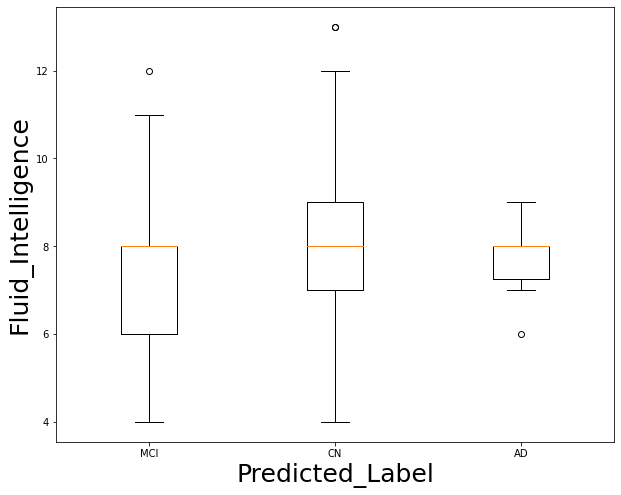

In [87]:
final_df = pd.merge(label_df, meta_data_df, on='Subject_ID', how='outer')
final_df = final_df.dropna()
make_box_plot(final_df,'Predicted_Label', 'Fluid_Intelligence')

## Model Iteration #3

In [26]:
x_train_array,y_train_array=x_train.to_numpy(),y_train.to_numpy()
clf = RandomForestClassifier(max_depth=8, random_state=0,class_weight='balanced',n_estimators=900,verbose=1)
clf.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   18.0s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=900,
                       random_state=0, verbose=1)

In [27]:
ukb_df=all_merged[all_merged.Dataset=="UKB"]
ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))  
label_df=ukb_df[['Subject_ID','Predicted_Label']]
label_df.to_csv("ukb_predicted_labels_set3.csv",index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.0s finished
<ipython-input-27-30b70a864dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))


In [28]:
label_df['Predicted_Label'].value_counts()

CN     17289
MCI    14717
AD      1045
Name: Predicted_Label, dtype: int64

In [29]:
balanced_accuracy_score(y_train_array, clf.predict(x_train_array))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.4s finished


0.9231825715430091

In [30]:
print(classification_report(y_train_array, clf.predict(x_train_array)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

          AD       0.94      0.93      0.93       960
          CN       0.85      0.99      0.91      1077
         MCI       0.97      0.85      0.90      1428

    accuracy                           0.92      3465
   macro avg       0.92      0.92      0.92      3465
weighted avg       0.92      0.92      0.92      3465



[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.4s finished


## Model Iteration #4

In [31]:
x_train_array,y_train_array=x_train.to_numpy(),y_train.to_numpy()
clf = RandomForestClassifier(max_depth=5, random_state=0,class_weight='balanced',n_estimators=600,verbose=1,max_features="log2")
clf.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    5.6s finished


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', n_estimators=600, random_state=0,
                       verbose=1)

In [32]:
ukb_df=all_merged[all_merged.Dataset=="UKB"]
ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))  
label_df=ukb_df[['Subject_ID','Predicted_Label']]
label_df.to_csv("ukb_predicted_labels_set4.csv",index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.4s finished
<ipython-input-32-223a77c9796c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))


In [33]:
label_df['Predicted_Label'].value_counts()

CN     24895
MCI     6183
AD      1973
Name: Predicted_Label, dtype: int64

In [34]:
balanced_accuracy_score(y_train_array, clf.predict(x_train_array))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished


0.7224508861111761

In [35]:
print(classification_report(y_train_array, clf.predict(x_train_array)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished


              precision    recall  f1-score   support

          AD       0.68      0.81      0.74       960
          CN       0.66      0.88      0.76      1077
         MCI       0.76      0.48      0.59      1428

    accuracy                           0.70      3465
   macro avg       0.70      0.72      0.70      3465
weighted avg       0.71      0.70      0.68      3465



## Model Iteration #5

In [36]:
x_train_array,y_train_array=x_train.to_numpy(),y_train.to_numpy()
clf = RandomForestClassifier(max_depth=8, random_state=0,class_weight='balanced',n_estimators=1200,verbose=1)
clf.fit(x_train_array, y_train_array)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   23.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=1200,
                       random_state=0, verbose=1)

In [37]:
ukb_df=all_merged[all_merged.Dataset=="UKB"]
ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))  
label_df=ukb_df[['Subject_ID','Predicted_Label']]
label_df.to_csv("ukb_predicted_labels_set5.csv",index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.2s finished
<ipython-input-37-5a690c82caa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukb_df["Predicted_Label"]=clf.predict(ukb_df.drop(columns = ['Group','Subject_ID','Date_of_Brain_Scan','Scanner_Proxy','Dataset']))


In [38]:
label_df['Predicted_Label'].value_counts()

CN     17113
MCI    14887
AD      1051
Name: Predicted_Label, dtype: int64

In [39]:
balanced_accuracy_score(y_train_array, clf.predict(x_train_array))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.5s finished


0.9243874255830465

In [40]:
print(classification_report(y_train_array, clf.predict(x_train_array)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

          AD       0.94      0.93      0.93       960
          CN       0.85      0.99      0.91      1077
         MCI       0.97      0.85      0.91      1428

    accuracy                           0.92      3465
   macro avg       0.92      0.92      0.92      3465
weighted avg       0.92      0.92      0.92      3465



[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.5s finished


## Fluid Intelligence

In [2]:
brain_df=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb_brain_imaging_metadata.csv")

brain_imaging_subjects = list(brain_df['eid'].unique())

In [1]:
import pandas as pd
#20023 Mean time to correctly identify matches
#20016 Fluid intelligence score
#4080 Blood_Pressure
relevant_cols=["eid","20016-0.0","20016-1.0","20016-2.0","20016-3.0","20023-0.0","20023-1.0","20023-2.0","20023-3.0","4080-0.0","4080-0.1","4080-1.0","4080-1.1","4080-2.0","4080-2.1","4080-3.0","4080-3.1"]
meta_data_df = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb49570.csv", usecols = relevant_cols)

In [3]:
ukb_subjects = brain_imaging_subjects

In [4]:
meta_data_df = meta_data_df[meta_data_df['eid'].isin(ukb_subjects)]

In [6]:
changes={"20016-2.0":"Fluid_Intelligence", "eid": "Subject_ID"}
meta_data_df=meta_data_df.rename(changes, axis=1)

In [5]:
meta_data_df.count()

eid          49400
4080-0.0     45924
4080-0.1     45203
4080-1.0      8274
4080-1.1      8270
4080-2.0     39545
4080-2.1     38880
4080-3.0      4878
4080-3.1      4879
20016-0.0    16555
20016-1.0     8289
20016-2.0    45038
20016-3.0     4250
20023-0.0    49259
20023-1.0     8310
20023-2.0    45614
20023-3.0     4261
dtype: int64

In [62]:
meta_data_df['20016-2.0'].describe()

count    28253.000000
mean         6.602945
std          2.058175
min          0.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: 20016-2.0, dtype: float64

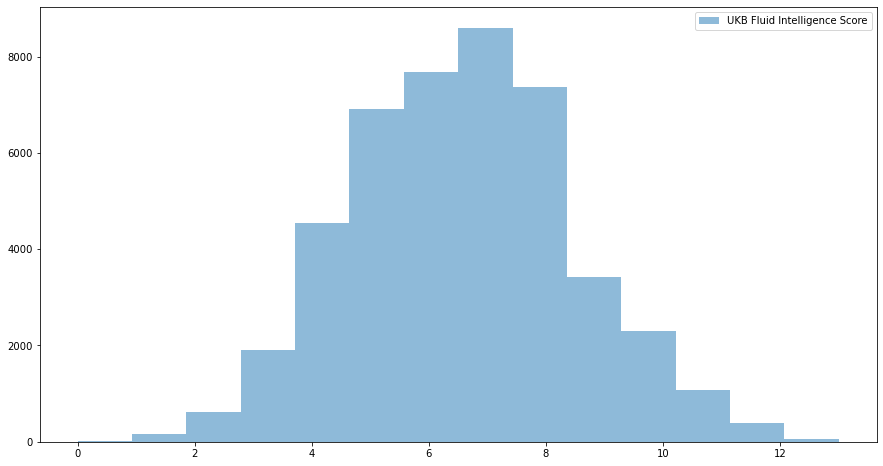

In [11]:
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)
pyplot.hist(meta_data_df['Fluid_Intelligence'], bins=14, alpha=0.5, label='UKB Fluid Intelligence Score')
pyplot.legend(loc='upper right')
pyplot.show()

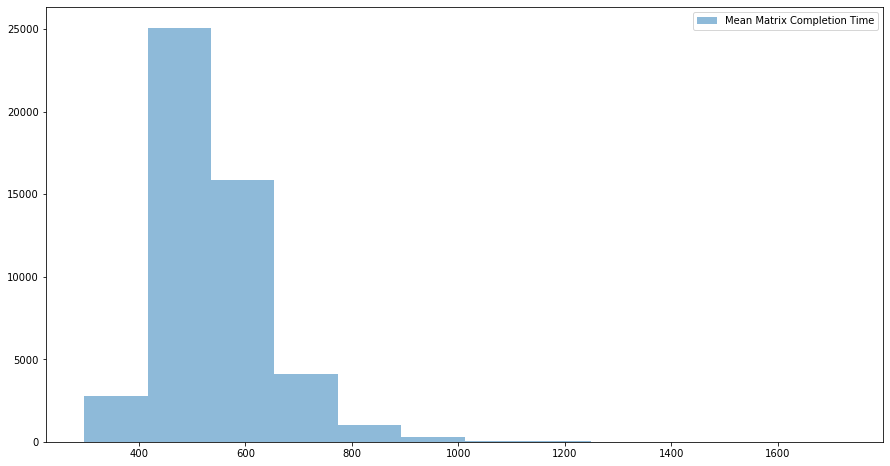

In [17]:
plt.rcParams['figure.figsize'] = (15,8)
pyplot.hist(meta_data_df['20023-0.0'], bins=12, alpha=0.5, label='Mean Matrix Completion Time')
pyplot.legend(loc='upper right')
pyplot.show()

In [47]:
((2.5 < meta_data_df['20016-2.0']) & (meta_data_df['20016-2.0'] < 4.4)).sum()

4004

In [48]:
(4.2 < meta_data_df['20016-2.0']).sum()

23784

In [49]:
(meta_data_df['20016-2.0'] < 2.5).sum()

465

In [50]:
meta_data_df['20023-0.0'].describe()

count    30666.000000
mean       537.835486
std         99.775798
min        297.000000
25%        469.000000
50%        520.000000
75%        586.000000
max       1726.000000
Name: 20023-0.0, dtype: float64

In [64]:
meta_data_df.head(5)

,Subject_ID,4080-0.0,4080-0.1,4080-1.0,4080-1.1,4080-2.0,4080-2.1,4080-3.0,4080-3.1,20016-0.0,20016-1.0,Fluid_Intelligence,20016-3.0,20023-0.0,20023-1.0,20023-2.0,20023-3.0
28,1000295,152.0,NaN,NaN,NaN,139.0,115.0,155.0,160.0,11.0,NaN,NaN,11.0,457.0,NaN,NaN,476.0
38,1000397,173.0,154.0,NaN,NaN,139.0,117.0,NaN,NaN,7.0,NaN,6.0,NaN,613.0,NaN,584.0,NaN
42,1000432,131.0,119.0,NaN,NaN,135.0,137.0,NaN,NaN,8.0,NaN,7.0,NaN,429.0,NaN,600.0,NaN
58,1000591,110.0,112.0,NaN,NaN,148.0,135.0,NaN,NaN,7.0,NaN,9.0,NaN,617.0,NaN,507.0,NaN
87,1000882,122.0,126.0,NaN,NaN,134.0,133.0,NaN,NaN,10.0,NaN,7.0,NaN,386.0,NaN,510.0,NaN


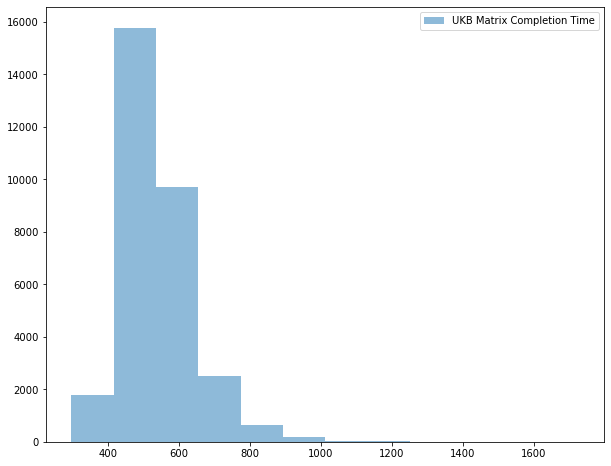

In [106]:
pyplot.hist(meta_data_df['20023-0.0'], bins=12, alpha=0.5, label='UKB Matrix Completion Time')
pyplot.legend(loc='upper right')
pyplot.show()

In [65]:
final_df = pd.merge(label_df, meta_data_df, on='Subject_ID', how='outer')

In [66]:
final_df.head(10)

,Subject_ID,Predicted_Label,4080-0.0,4080-0.1,4080-1.0,4080-1.1,4080-2.0,4080-2.1,4080-3.0,4080-3.1,20016-0.0,20016-1.0,Fluid_Intelligence,20016-3.0,20023-0.0,20023-1.0,20023-2.0,20023-3.0
0,1000295,MCI,152.0,NaN,NaN,NaN,139.0,115.0,155.0,160.0,11.0,NaN,NaN,11.0,457.0,NaN,NaN,476.0
1,1000295,MCI,152.0,NaN,NaN,NaN,139.0,115.0,155.0,160.0,11.0,NaN,NaN,11.0,457.0,NaN,NaN,476.0
2,1000397,CN,173.0,154.0,NaN,NaN,139.0,117.0,NaN,NaN,7.0,NaN,6.0,NaN,613.0,NaN,584.0,NaN
3,1000432,MCI,131.0,119.0,NaN,NaN,135.0,137.0,NaN,NaN,8.0,NaN,7.0,NaN,429.0,NaN,600.0,NaN
4,1000591,MCI,110.0,112.0,NaN,NaN,148.0,135.0,NaN,NaN,7.0,NaN,9.0,NaN,617.0,NaN,507.0,NaN
5,1000882,MCI,122.0,126.0,NaN,NaN,134.0,133.0,NaN,NaN,10.0,NaN,7.0,NaN,386.0,NaN,510.0,NaN
6,1001753,CN,150.0,139.0,NaN,NaN,NaN,NaN,184.0,176.0,NaN,NaN,4.0,NaN,633.0,NaN,558.0,NaN
7,1002306,CN,125.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,641.0,NaN,741.0,NaN
8,1002603,CN,132.0,125.0,NaN,NaN,155.0,158.0,NaN,NaN,NaN,NaN,5.0,NaN,567.0,NaN,636.0,NaN
9,1002719,CN,133.0,133.0,193.0,135.0,139.0,139.0,NaN,NaN,NaN,7.0,4.0,NaN,457.0,508.0,476.0,NaN


In [67]:
fi_score_mci=final_df[final_df.Predicted_Label=="MCI"]['Fluid_Intelligence']
fi_score_ad=final_df[final_df.Predicted_Label=="AD"]['Fluid_Intelligence']
fi_score_cn=final_df[final_df.Predicted_Label=="CN"]['Fluid_Intelligence']

In [84]:
# pyplot.hist(fi_score_mci, bins=5, alpha=0.5, label='FI MCI')
# pyplot.hist(fi_score_ad, bins=5, alpha=0.5, label='FI AD')
# pyplot.hist(fi_score_cn, bins=5, alpha=0.5, label='FI CN')
# pyplot.legend(loc='upper right')
# pyplot.show()

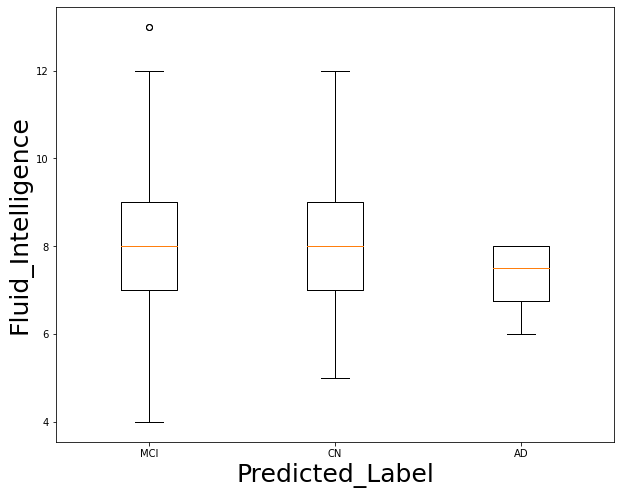

In [81]:
make_box_plot(final_df,'Predicted_Label', 'Fluid_Intelligence')

In [78]:
final_df = final_df.dropna()

In [79]:
final_df['Predicted_Label'].unique()

array(['MCI', 'CN', 'AD'], dtype=object)

In [82]:
import scipy

In [83]:
scipy.stats.ttest_ind(final_df[final_df.Predicted_Label=="AD"]['Fluid_Intelligence'],final_df[final_df.Predicted_Label=="MCI"]['Fluid_Intelligence'])

Ttest_indResult(statistic=-0.5207812275500967, pvalue=0.6040332157410515)

In [ ]:
scipy.stats.ttest_ind(final_df[final_df.Predicted_Label=="AD"]['Fluid_Intelligence'],final_df[final_df.Predicted_Label=="MCI"]['Fluid_Intelligence'])

In [94]:
harmonized_df_version7 = pd.read_csv('adni_ukb_harmonized_04_19_2022.csv')
harmonized_df_version7 = harmonized_df_version7.drop('Unnamed: 0', 1)

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [95]:
harmonized_df_version6 = pd.read_csv(ukb_adni_directory_path+"harmonized_adni6_ukb_May2022.csv")
harmonized_df_version6 = harmonized_df_version6.drop('Unnamed: 0', 1)

In [90]:
ukb_adni_directory_path="/ocean/projects/asc170022p/tighu/ADNI_UKB_Harmonization_May_2022/"

In [96]:
harmonized_df_version7.head(5)

,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,data_combat.lh_inferiorparietal_thickness.combat,...,data_combat.rhCerebralWhiteMatterVol.combat,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol_to_eTIV.combat,data_combat.MaskVol_to_eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1000295,10/27/17,Newcastle,2.299373,1.178016,2.287103,2.016386,3.027922,2.889670,2.508926,...,355771.080853,715722.187933,85817.959195,823955.554473,1.405024e+06,1.366983e+06,1.977764e+06,0.967584,1.202698,1.584354e+06
1,1000397,3/7/18,Newcastle,2.503140,2.950437,2.996597,1.888863,3.623515,2.938641,2.800982,...,229635.383872,457205.498519,53154.338046,640662.044816,1.041020e+06,9.958223e+05,1.566572e+06,0.774727,1.032757,1.517181e+06
2,1000432,7/14/18,Cheadle,2.737478,3.281952,2.779994,1.967534,3.182034,2.936833,2.647389,...,253419.027393,509236.303115,55475.078994,669298.568089,1.086424e+06,1.059269e+06,1.617140e+06,0.831640,1.081098,1.500149e+06
3,1000591,7/9/19,Reading,2.782031,2.329985,3.099483,2.080185,3.255097,3.032491,2.596970,...,277871.889471,555717.486172,64512.774485,755549.214168,1.205461e+06,1.181405e+06,1.834423e+06,0.806231,1.086501,1.699154e+06
4,1000882,11/16/17,Cheadle,2.451791,2.751639,2.997359,1.808021,3.318435,2.786587,2.656467,...,327826.552402,652025.621168,66281.529169,745162.803822,1.298829e+06,1.271995e+06,1.866079e+06,0.789931,1.011268,1.841840e+06


In [97]:
harmonized_df_version6.head(5)

,data_combat.Subject_ID,data_combat.Date_of_Brain_Scan,data_combat.Scanner_Proxy,data_combat.lh_bankssts_thickness.combat,data_combat.lh_caudalanteriorcingulate_thickness.combat,data_combat.lh_caudalmiddlefrontal_thickness.combat,data_combat.lh_cuneus_thickness.combat,data_combat.lh_entorhinal_thickness.combat,data_combat.lh_fusiform_thickness.combat,data_combat.lh_inferiorparietal_thickness.combat,...,data_combat.CerebralWhiteMatterVol.combat,data_combat.SubCortGrayVol.combat,data_combat.TotalGrayVol.combat,data_combat.SupraTentorialVol.combat,data_combat.SupraTentorialVolNotVent.combat,data_combat.SupraTentorialVolNotVentVox.combat,data_combat.MaskVol.combat,data_combat.BrainSegVol.to.eTIV.combat,data_combat.MaskVol.to.eTIV.combat,data_combat.EstimatedTotalIntraCranialVol.combat
0,1000295,2017-10-27,Newcastle,2.296284,1.178939,2.276881,2.015306,3.044882,2.892787,2.501170,...,718072.352420,86726.540546,822884.151319,1.401979e+06,1.363809e+06,1.358895e+06,1.963492e+06,0.967215,1.195924,1.546517e+06
1,1000397,2018-03-07,Newcastle,2.500101,2.969933,2.990356,1.886608,3.656489,2.944818,2.794912,...,458285.797056,53041.117324,639324.340096,1.039510e+06,9.951820e+05,9.904603e+05,1.562235e+06,0.774657,1.028857,1.517763e+06
2,1000432,2018-07-14,Cheadle,2.734754,3.305112,2.774210,1.966005,3.201053,2.943196,2.642145,...,510200.433871,55275.471305,667856.449483,1.085389e+06,1.059081e+06,1.054203e+06,1.609321e+06,0.831234,1.079333,1.498252e+06
3,1000591,2019-07-09,Reading,2.779423,2.344385,3.093786,2.079017,3.275997,3.038995,2.591875,...,557101.565580,64589.102686,754345.174149,1.203525e+06,1.179758e+06,1.177390e+06,1.834101e+06,0.806057,1.083917,1.700009e+06
4,1000882,2017-11-16,Cheadle,2.448656,2.768825,2.991334,1.804743,3.340516,2.790543,2.651284,...,654223.943732,66444.846520,743922.205485,1.296093e+06,1.269282e+06,1.264942e+06,1.865044e+06,0.789774,1.006210,1.843770e+06


In [98]:
harmonized_df_version7=harmonized_df_version7[["data_combat.Subject_ID","data_combat.TotalGrayVol.combat"]]

In [99]:
harmonized_df_version6=harmonized_df_version6[["data_combat.Subject_ID","data_combat.TotalGrayVol.combat"]]

In [100]:
changes={"data_combat.TotalGrayVol.combat":"gray_matter_volume_version6"}
harmonized_df_version6=harmonized_df_version6.rename(changes, axis=1)

In [101]:
df_ver6_ver7 = pd.merge(harmonized_df_version7, harmonized_df_version6, on='data_combat.Subject_ID', how='outer')

In [102]:
df_ver6_ver7.head(5)

,data_combat.Subject_ID,data_combat.TotalGrayVol.combat,gray_matter_volume_version6
0,1000295,823955.554473,822884.151319
1,1000295,823955.554473,795028.115605
2,1000295,796281.662737,822884.151319
3,1000295,796281.662737,795028.115605
4,1000397,640662.044816,639324.340096


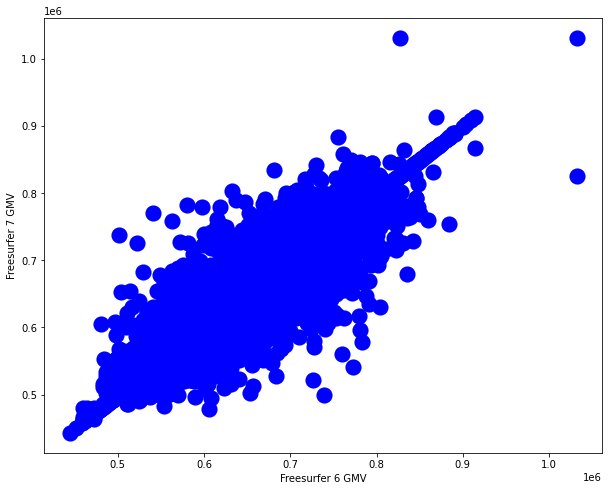

In [103]:
plt.scatter(df_ver6_ver7['data_combat.TotalGrayVol.combat'].values,df_ver6_ver7['gray_matter_volume_version6'].values, c ="blue",linewidths = 2,s = 200)

plt.xlabel("Freesurfer 6 GMV")
plt.ylabel("Freesurfer 7 GMV")
plt.show()
#slope intercept r2

## Box Plots 6 v 7

In [113]:
unharmonized_df_version7=pd.read_csv("adni_ukb_stacked_april19.csv")
unharmonized_df_version6=pd.read_csv(ukb_adni_directory_path+"adni_6_ukb_stacked_may2022.csv")
df_ver6_ver7 = pd.merge(unharmonized_df_version6, unharmonized_df_version7, on='Subject_ID', how='inner',suffixes=["_ver6","_ver7"])  

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
df_ver6_ver7.head(10)

,Subject_ID,Group_ver6,Sex_ver6,Age_ver6,Date_of_Brain_Scan_ver6,Scanner_Proxy_ver6,lh_bankssts_thickness_ver6,lh_caudalanteriorcingulate_thickness_ver6,lh_caudalmiddlefrontal_thickness_ver6,lh_cuneus_thickness_ver6,...,CerebralWhiteMatterVol_ver7,SubCortGrayVol_ver7,TotalGrayVol_ver7,SupraTentorialVol_ver7,SupraTentorialVolNotVent_ver7,MaskVol_ver7,BrainSegVol_to_eTIV,MaskVol_to_eTIV,EstimatedTotalIntraCranialVol_ver7,Dataset_ver7
0,1000295,CN,M,59,2017-10-27,Newcastle,2.362,1.277,2.511,2.038,...,685393.828367,74024,818307.374370,1.388836e+06,1.351159e+06,1988305,0.904154,1.135316,1.751323e+06,UKB
1,1000295,CN,M,59,2017-10-27,Newcastle,2.362,1.277,2.511,2.038,...,661500.270509,62327,803171.631972,1.367222e+06,1.326980e+06,2012784,0.807940,1.049594,1.917679e+06,UKB
2,1000295,CN,M,62,2020-01-03,Newcastle,2.356,1.098,2.881,2.064,...,685393.828367,74024,818307.374370,1.388836e+06,1.351159e+06,1988305,0.904154,1.135316,1.751323e+06,UKB
3,1000295,CN,M,62,2020-01-03,Newcastle,2.356,1.098,2.881,2.064,...,661500.270509,62327,803171.631972,1.367222e+06,1.326980e+06,2012784,0.807940,1.049594,1.917679e+06,UKB
4,1000397,CN,F,59,2018-03-07,Newcastle,2.557,2.949,3.010,1.909,...,457599.361609,53103,645218.597035,1.042441e+06,1.000121e+06,1555091,0.783897,1.033555,1.504604e+06,UKB
5,1000432,CN,M,62,2018-07-14,Cheadle,2.747,3.181,2.813,1.984,...,512018.636518,55982,678619.948762,1.095522e+06,1.069967e+06,1617026,0.831715,1.077098,1.501280e+06,UKB
6,1000591,CN,M,62,2019-07-09,Reading,2.803,2.418,3.095,2.087,...,552322.212654,64072,762356.497882,1.213087e+06,1.187227e+06,1842042,0.803061,1.074893,1.713697e+06,UKB
7,1000882,CN,M,58,2017-11-16,Cheadle,2.506,2.722,2.997,1.847,...,641899.436195,66041,749467.819722,1.298545e+06,1.271570e+06,1862677,0.795217,1.013020,1.838737e+06,UKB
8,1001753,CN,F,72,2016-10-11,Cheadle,2.345,2.706,2.260,1.841,...,441248.890138,50577,571046.544022,9.218464e+05,9.128034e+05,1420115,0.775569,1.047759,1.355383e+06,UKB
9,1002306,CN,F,65,2018-10-01,Newcastle,2.848,3.295,2.789,1.912,...,441165.898192,51154,659790.557345,9.797735e+05,9.673775e+05,1551452,0.783441,1.057662,1.466869e+06,UKB


In [121]:
unharmonized_df_version7.shape

(36544, 141)

In [117]:
df_ver6_ver7=df_ver6_ver7.dropna()

In [119]:
unharmonized_df_version7['Subject_ID'].nunique()

31848

In [120]:
unharmonized_df_version6['Subject_ID'].nunique()

31845